In [6]:
%matplotlib inline
#
from LRGSG_package.shared import *
from LRGSG_package.LRGSG import Lattice2D, move_to_rootf
#
move_to_rootf(print_tf=True)
plt.style.use("ipynb/nb_plotsheet.mplstyle")

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [5]:
l = Lattice2D(10, geo='hexagonal', pbc=True, with_positions=True)
# l.flip_sel_edges(l.nwDict['single']['G'])
# l.load_eigV_on_graph(0)
# nx.draw_networkx_nodes(l.G, pos=l.get_node_pos(), 
#         node_size=300, node_color=l.get_node_attr('eigV0'))

# nx.draw_networkx_edges(l.G, pos=l.get_node_pos(), 
#         edge_color=l.get_edge_color())

In [4]:
# l = Lattice2D(10, geo='hexagonal', pbc=True, with_positions=True)
# l.flip_sel_edges(l.nwDict['single']['G'])
# l.load_eigV_on_graph(0)
# fig, ax = plt.subplots(ncols=2, figsize=(12, 12))
# for axx in ax:
#     axx.set_aspect('equal')
# nx.draw(l.G, ax=ax[0], pos=l.get_node_pos(), with_labels=True, node_size=100, edge_color=l.get_edge_color(), node_color=l.get_node_attr('eigV0'))
# ax[1].imshow(unravel_1d_to_2d_nodemap2(l.eigV[0], l.invnode_map, dims=(l.side2, l.side1)))

In [3]:
L = [16, 32, 64, 128]
cell = 'single'
number_of_averages = 1000
lrgpath = "data/cluster_data/l2d_squared/lrgsg/"

Text(0, 0.5, 'Probability Density')

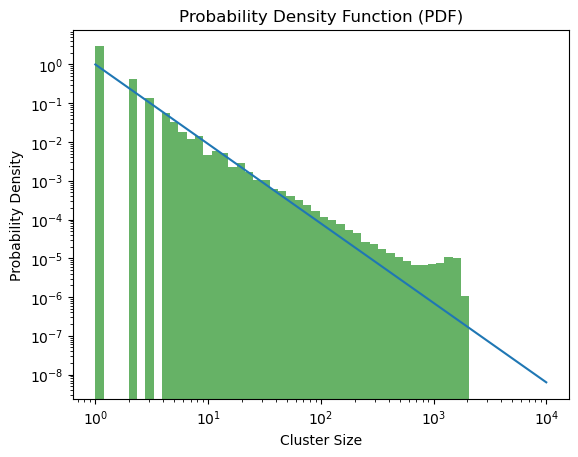

In [4]:
# Using logarithmic bins and density=True to normalize
side = 64
p = 0.2
fpath = f"{lrgpath}N={side**2}/pCluster_p={p:.3g}_{cell}_na={number_of_averages}.pkl"
try:
    with open(fpath, 'rb') as file:
        data = pickle.load(file)
except:
    print('no data found')
sizes, counts = map(np.array, zip(*sorted(data.items())))
data = np.repeat(sizes, counts)

bins = np.logspace(np.log10(min(data)), np.log10(side**2), 50)
plt.hist(data, bins=bins, density=True, alpha=0.6, color='g')
x = np.logspace(0, 4)
plt.plot(x, x**(-2.05))
plt.xscale('log')
plt.yscale('log')
plt.title('Probability Density Function (PDF)')
plt.xlabel('Cluster Size')
plt.ylabel('Probability Density')


In [5]:
import glob
import re
from collections import defaultdict

# Pattern to match "p=VALUE" where VALUE is the p value
pattern = r"p=([\d.]+)"

# Dictionary to hold sets of subdirectories for each found p value
p_values_dirs = defaultdict(set)

# Use glob to iterate over all .pkl files in subfolders of 'data/'
for filepath in glob.glob(f'{lrgpath}*/*.pkl'):
    match = re.search(pattern, filepath)
    if match:
        # Extract the p value
        p_value = float(match.group(1))
        # Extract subdirectory from the filepath
        # Adjust the split index based on your path structure
        subdirectory = filepath.split('/')[4]
        # Add the subdirectory to the set for this p value
        p_values_dirs[p_value].add(subdirectory)

# Prepare a list to hold p values and the number of sharing subdirectories
p_values_shared_count = []

# Filter and count p values that appear in at least two different subdirectories
for p_value, dirs in p_values_dirs.items():
    num_shared = len(dirs)
    if num_shared >= 2:
        p_values_shared_count.append((p_value, num_shared))

# Sort the list by p value
p_values_shared_count.sort()

# Print p values and their shared count
for p_value, count in p_values_shared_count:
    print(f"p={p_value} is shared by {count} subdirectories")

p=0.1 is shared by 3 subdirectories
p=0.109 is shared by 2 subdirectories
p=0.117 is shared by 2 subdirectories
p=0.134 is shared by 2 subdirectories
p=0.142 is shared by 2 subdirectories
p=0.15 is shared by 2 subdirectories
p=0.159 is shared by 2 subdirectories
p=0.167 is shared by 2 subdirectories
p=0.175 is shared by 2 subdirectories
p=0.183 is shared by 2 subdirectories
p=0.192 is shared by 4 subdirectories
p=0.2 is shared by 4 subdirectories
p=0.233 is shared by 4 subdirectories
p=0.267 is shared by 4 subdirectories
p=0.3 is shared by 4 subdirectories
p=0.333 is shared by 4 subdirectories
p=0.367 is shared by 4 subdirectories
p=0.4 is shared by 4 subdirectories
p=0.433 is shared by 4 subdirectories
p=0.467 is shared by 4 subdirectories
p=0.5 is shared by 4 subdirectories
p=0.625 is shared by 4 subdirectories
p=0.75 is shared by 4 subdirectories
p=0.875 is shared by 4 subdirectories
p=1.0 is shared by 4 subdirectories


### Plot sizes count

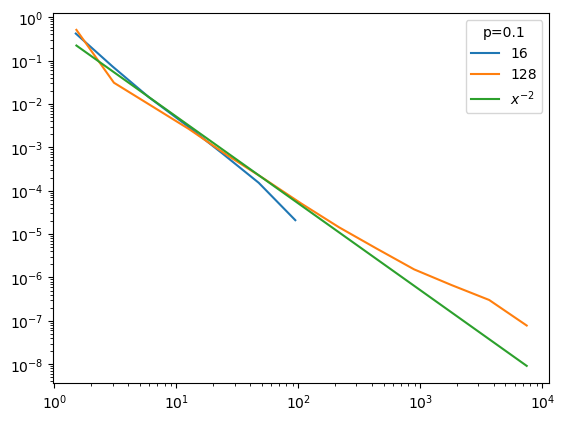

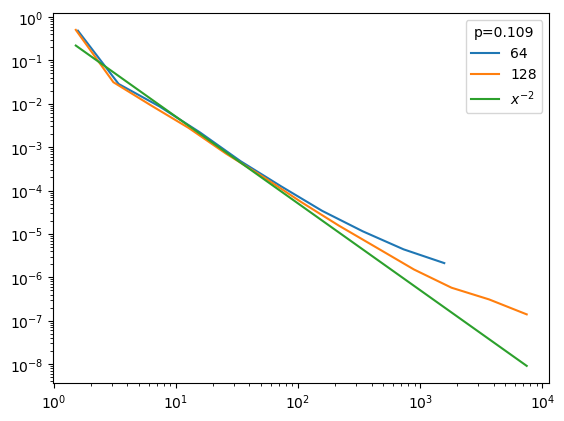

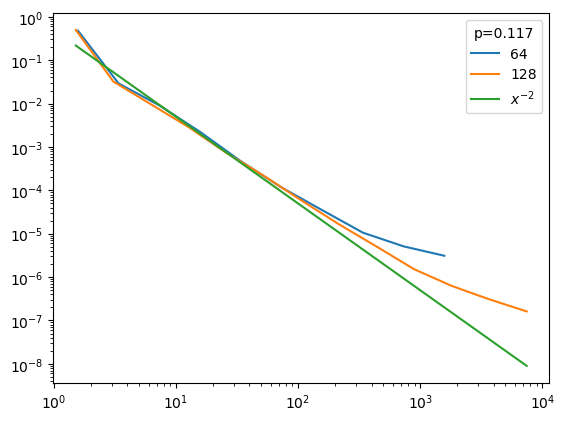

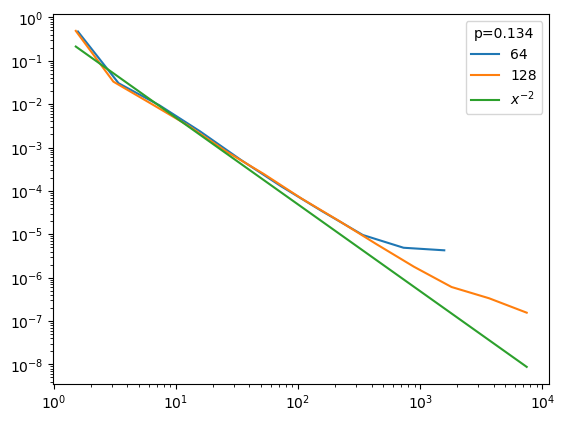

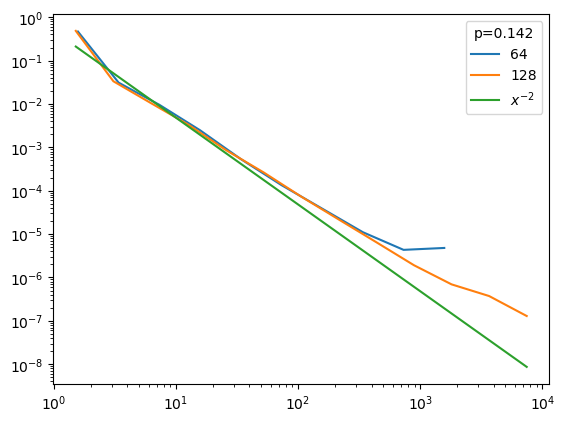

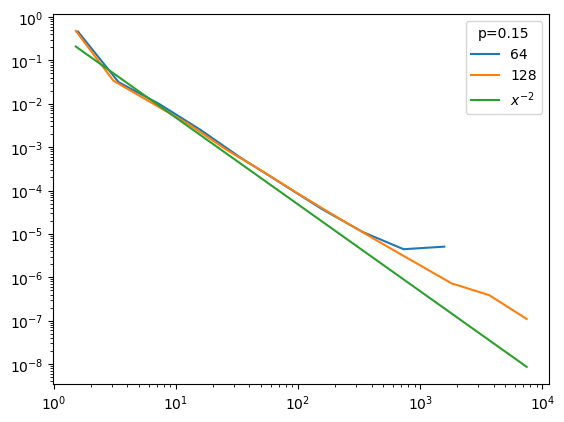

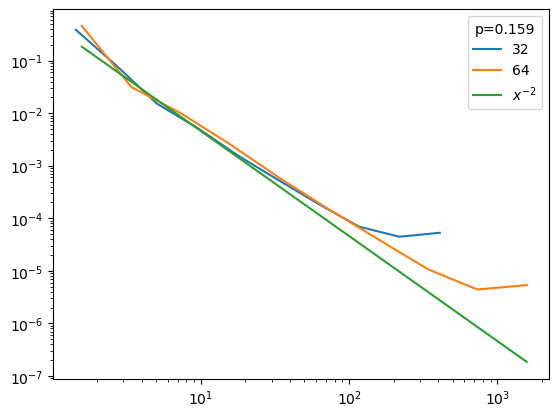

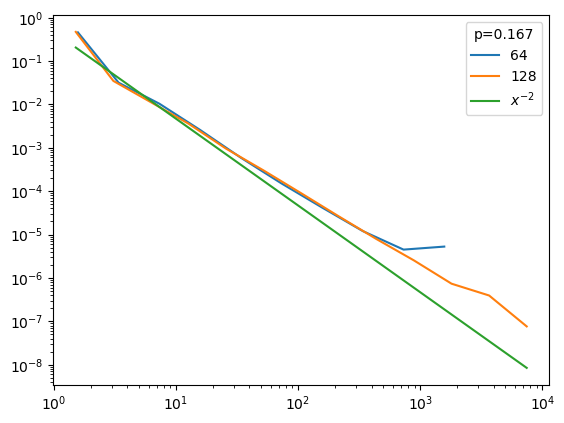

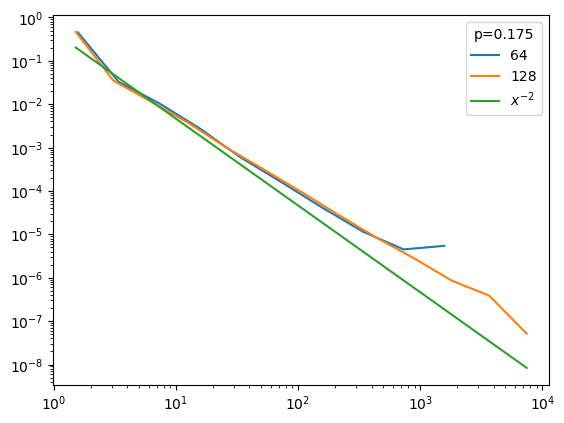

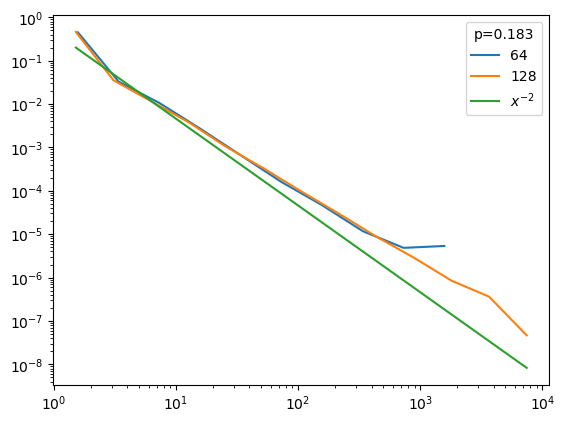

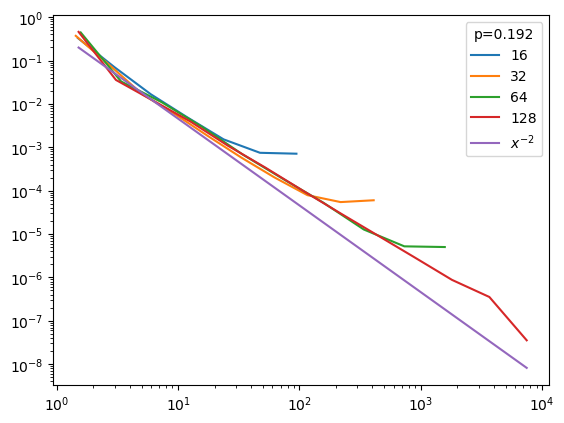

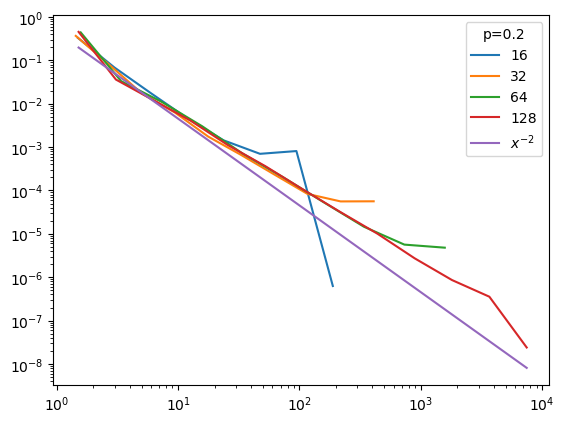

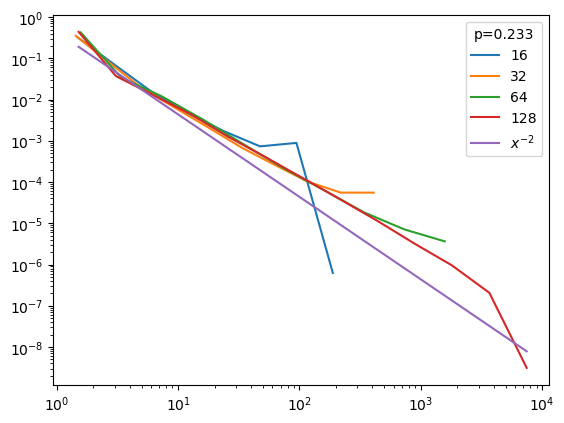

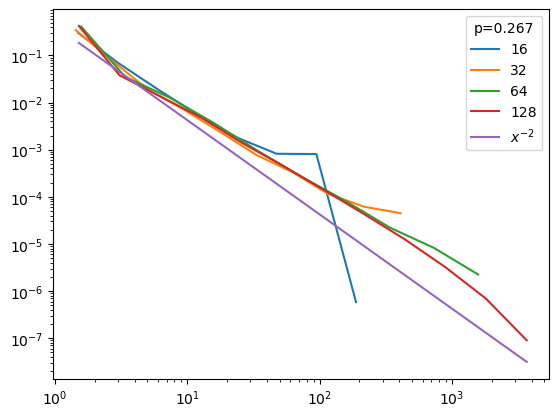

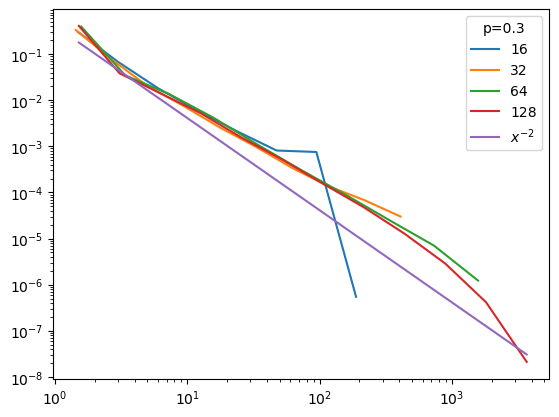

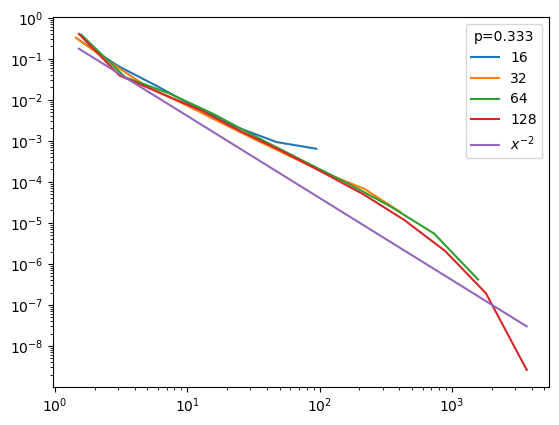

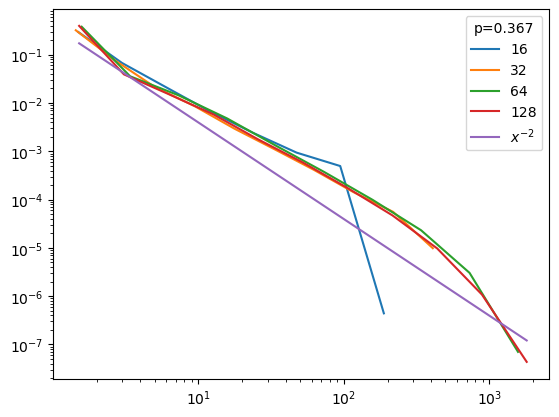

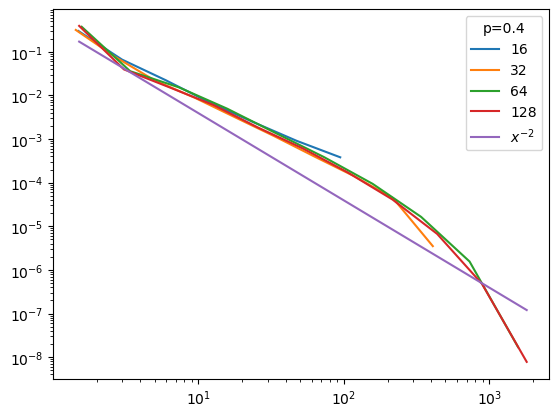

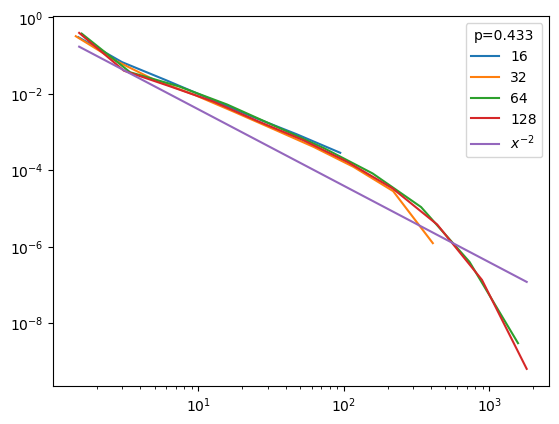

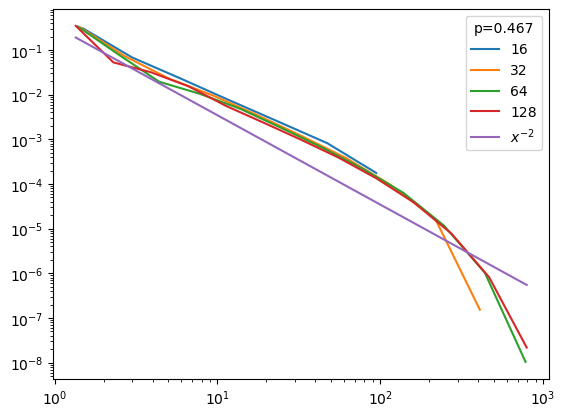

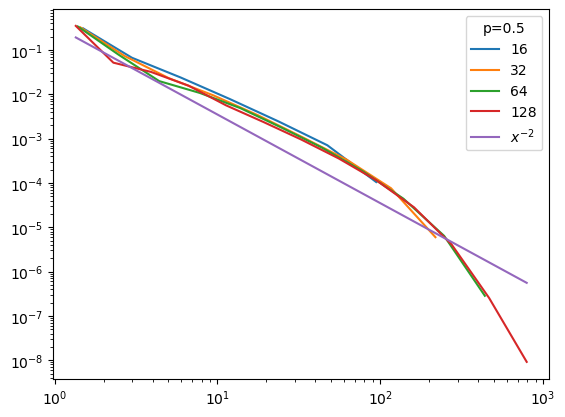

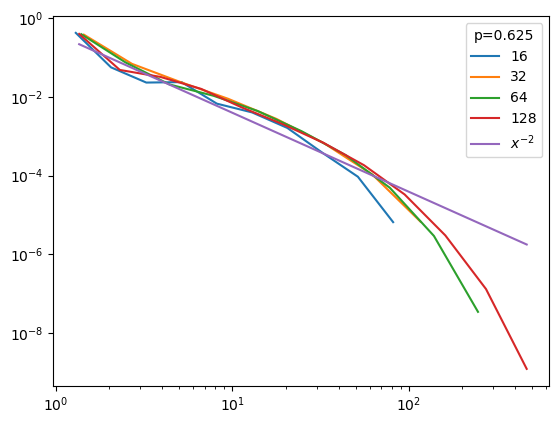

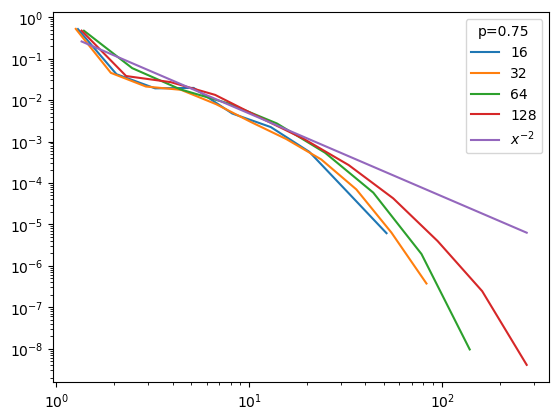

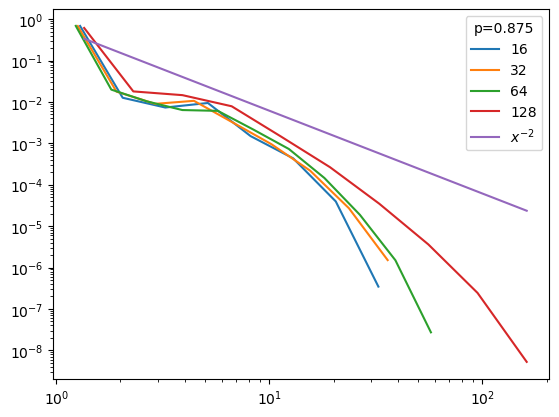

/tmp/ipykernel_4537/452597874.py:15: RuntimeWarning: divide by zero encountered in divide
  h = h/bw
/tmp/ipykernel_4537/452597874.py:15: RuntimeWarning: invalid value encountered in divide
  h = h/bw


ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 640x480 with 1 Axes>

In [19]:
for p,_ in p_values_shared_count:
    plt.figure()
    for side,bins in zip([8, 16, 32, 64, 128], [10, 11, 12, 13, 14]):
        fpath = f"{lrgpath}N={side**2}/pCluster_p={p:.3g}_{cell}_na={number_of_averages}.pkl"
        try:
            with open(fpath, 'rb') as file:
                data = pickle.load(file)
        except:
            continue
        sizes, counts = map(np.array, zip(*sorted(data.items())))
        data = np.repeat(sizes, counts)
        # plt.plot(sizes, counts/side**2, label=f"{side}")
        try:
            bc, h, bw = log_binning(data, binnum=bins)
            h = h/bw
            h = h/np.sum(bc*h)
            h = h[np.where(h>0)[0]]
            bc = bc[np.where(h>0)[0]]
            plt.plot(bc, h, label=f"{side}")
        except ValueError:
            pass
    try:
        plt.plot(bc, h[0]*bc.astype(float)**(-2), label=r"$x^{-2}$")
    except IndexError:
        pass
    # plt.ylim(bottom=1)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(title=f"p={p:.3g}")
    plt.show()

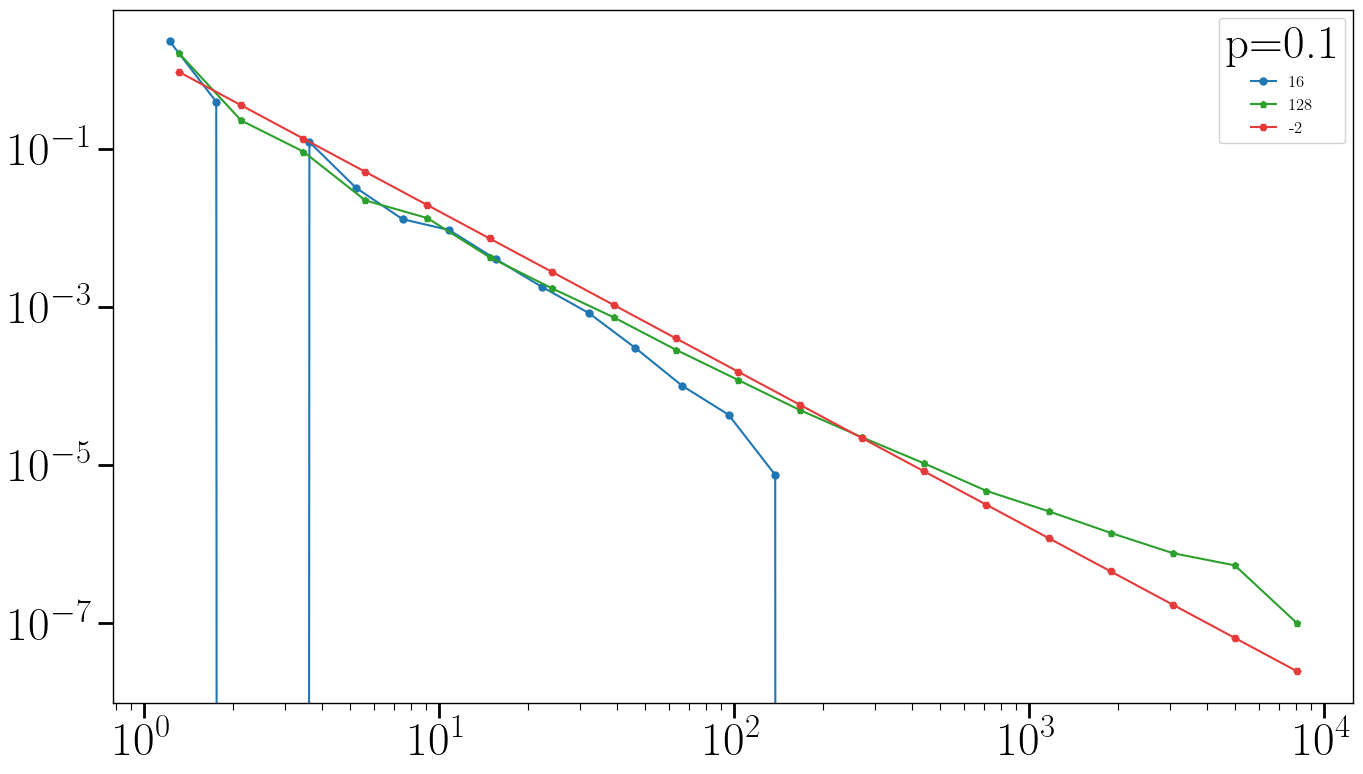

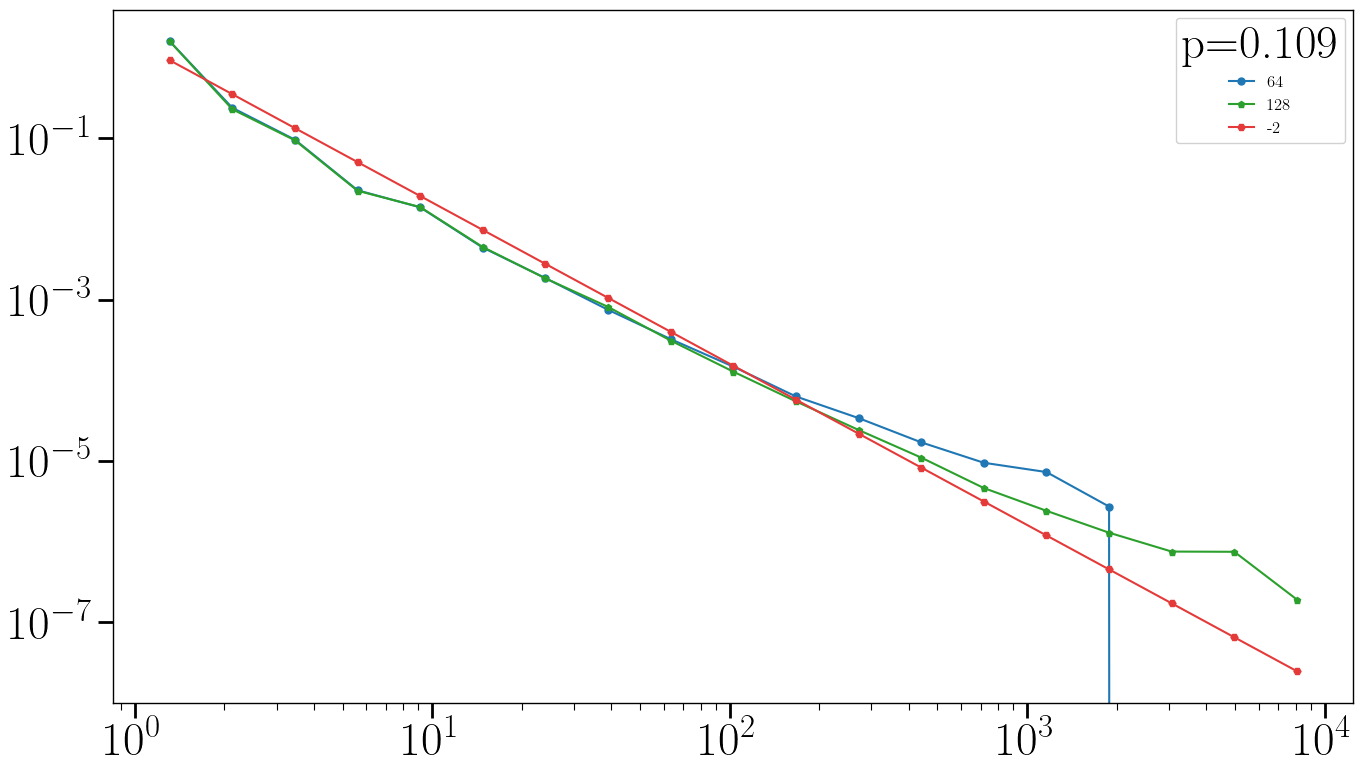

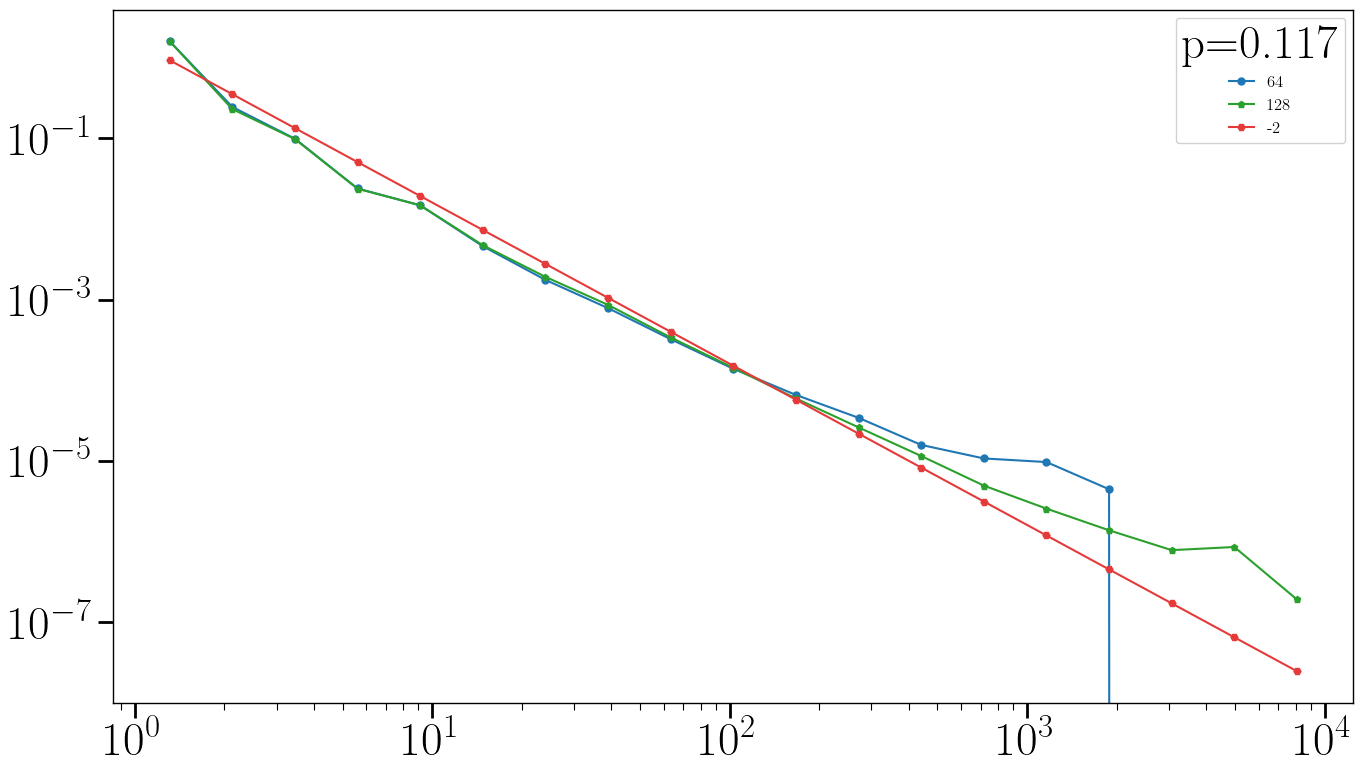

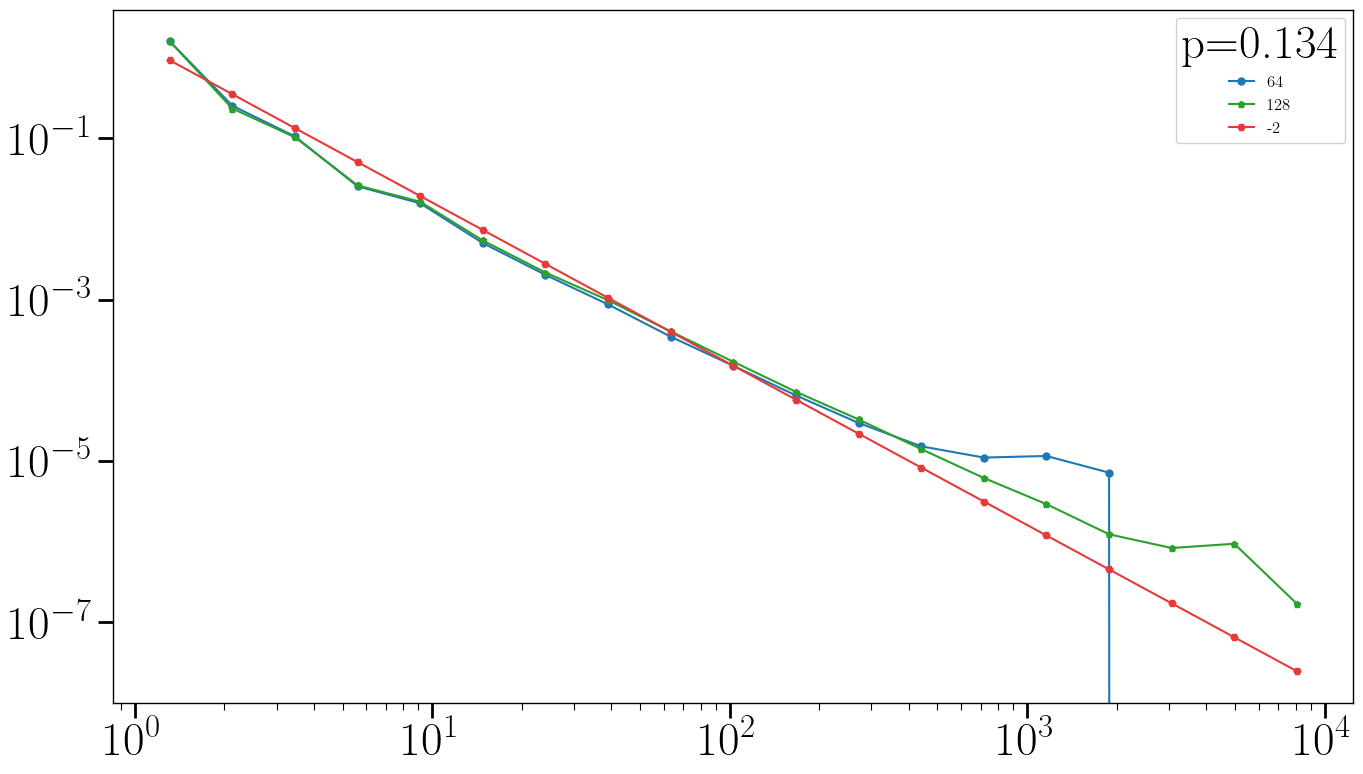

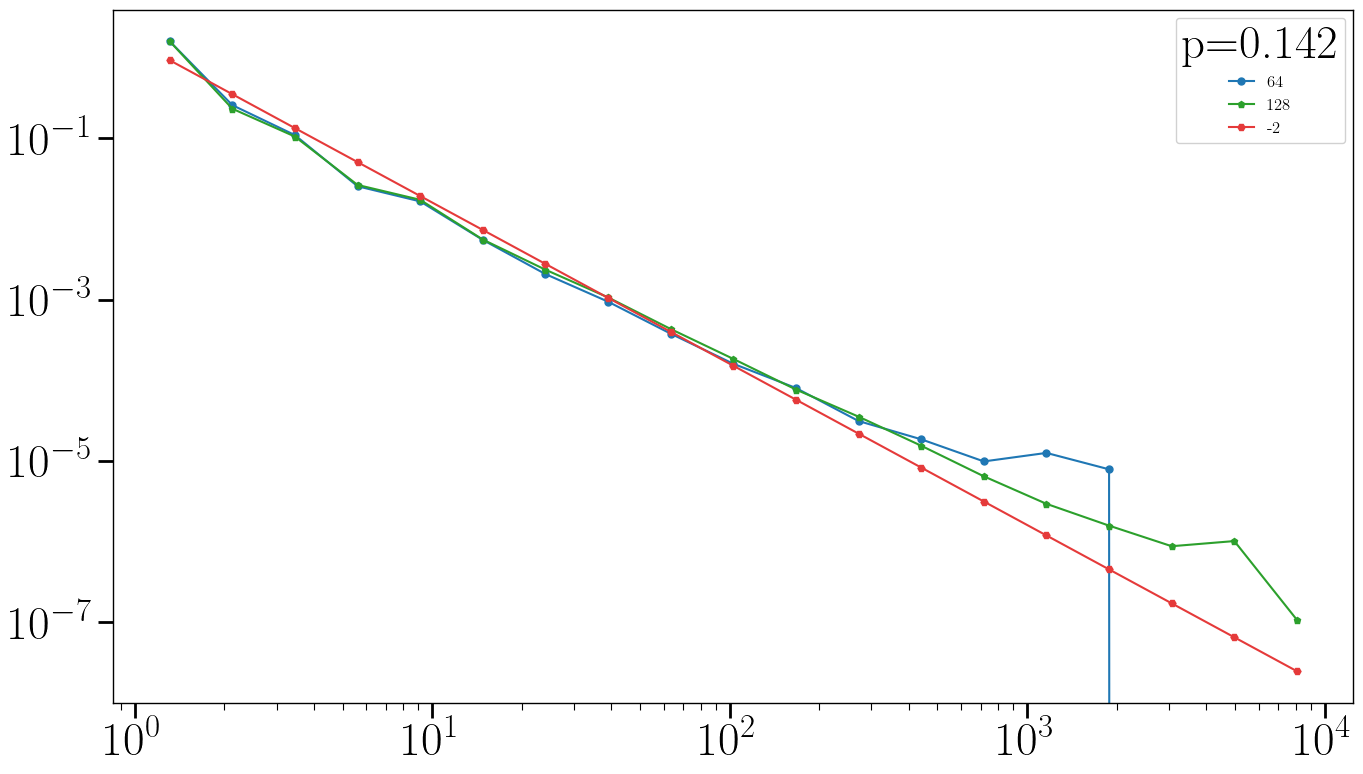

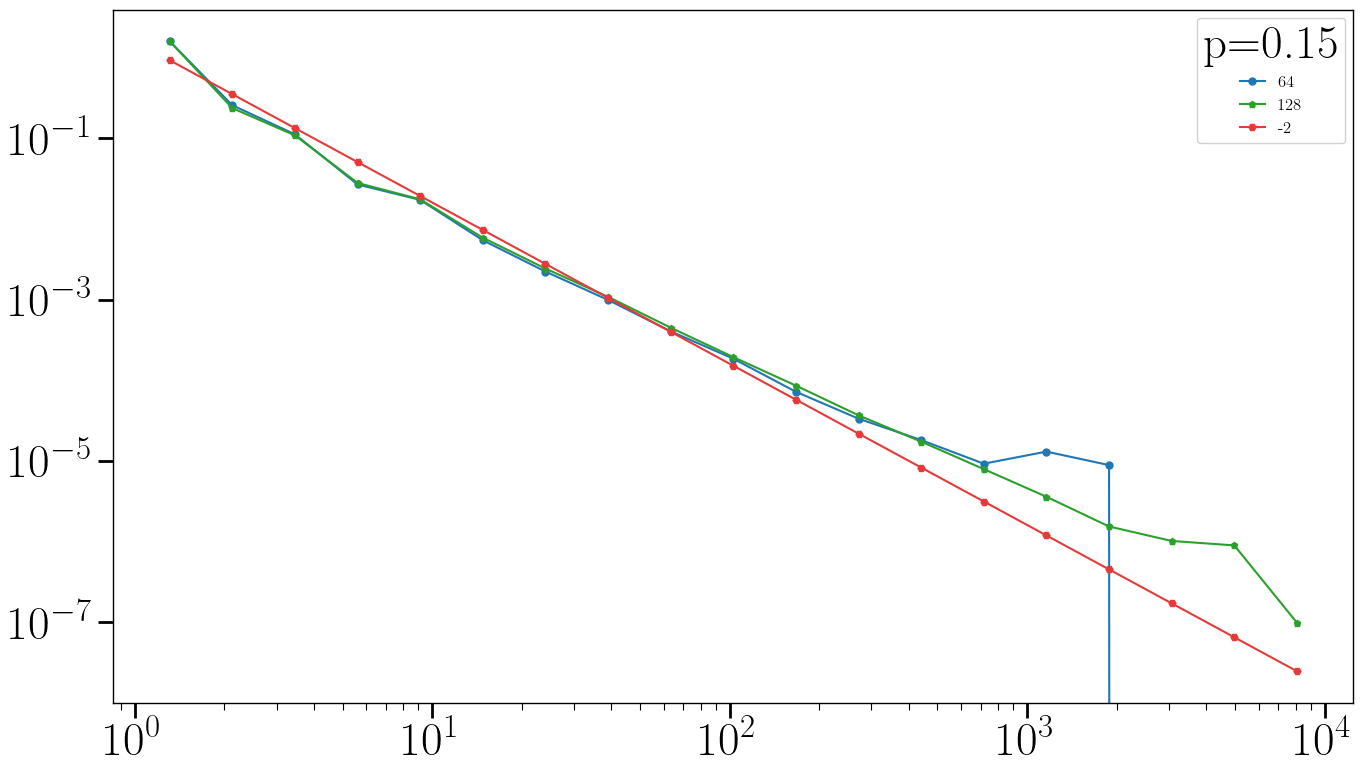

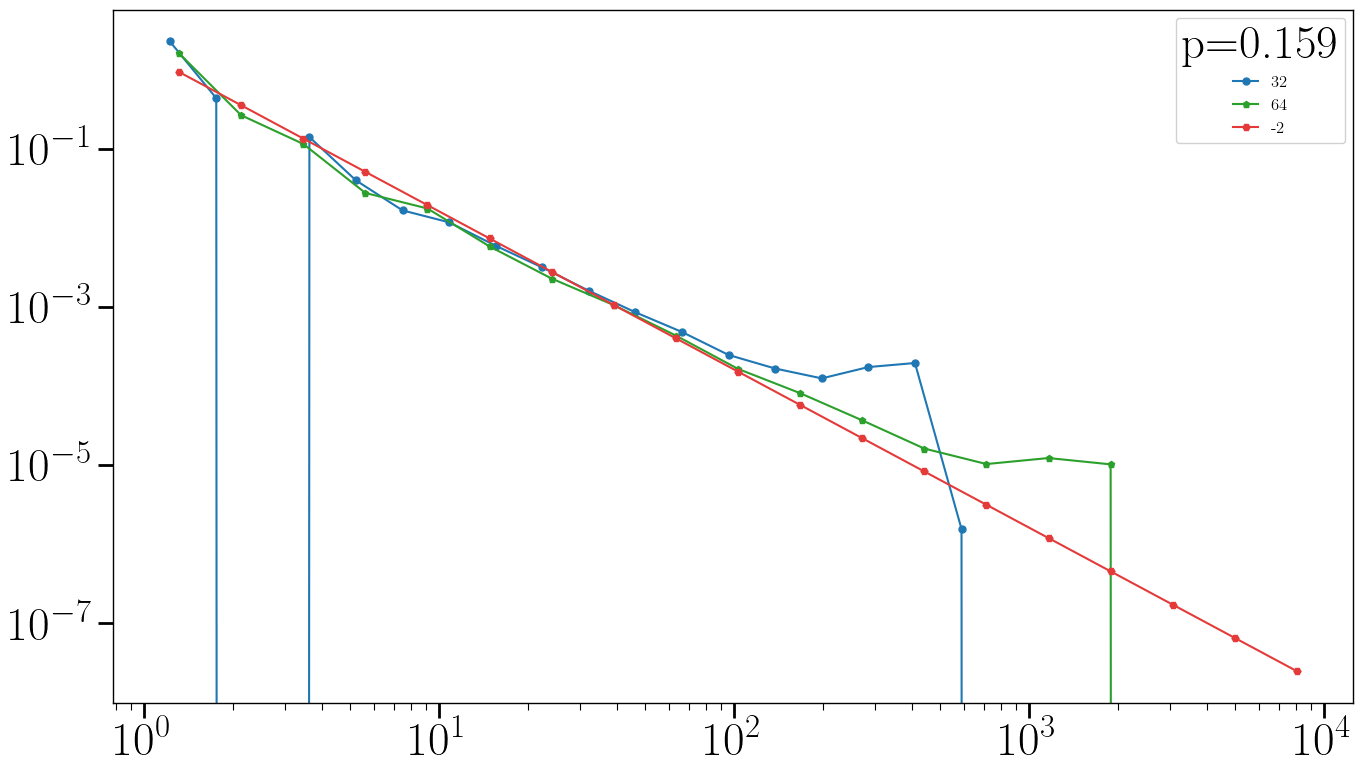

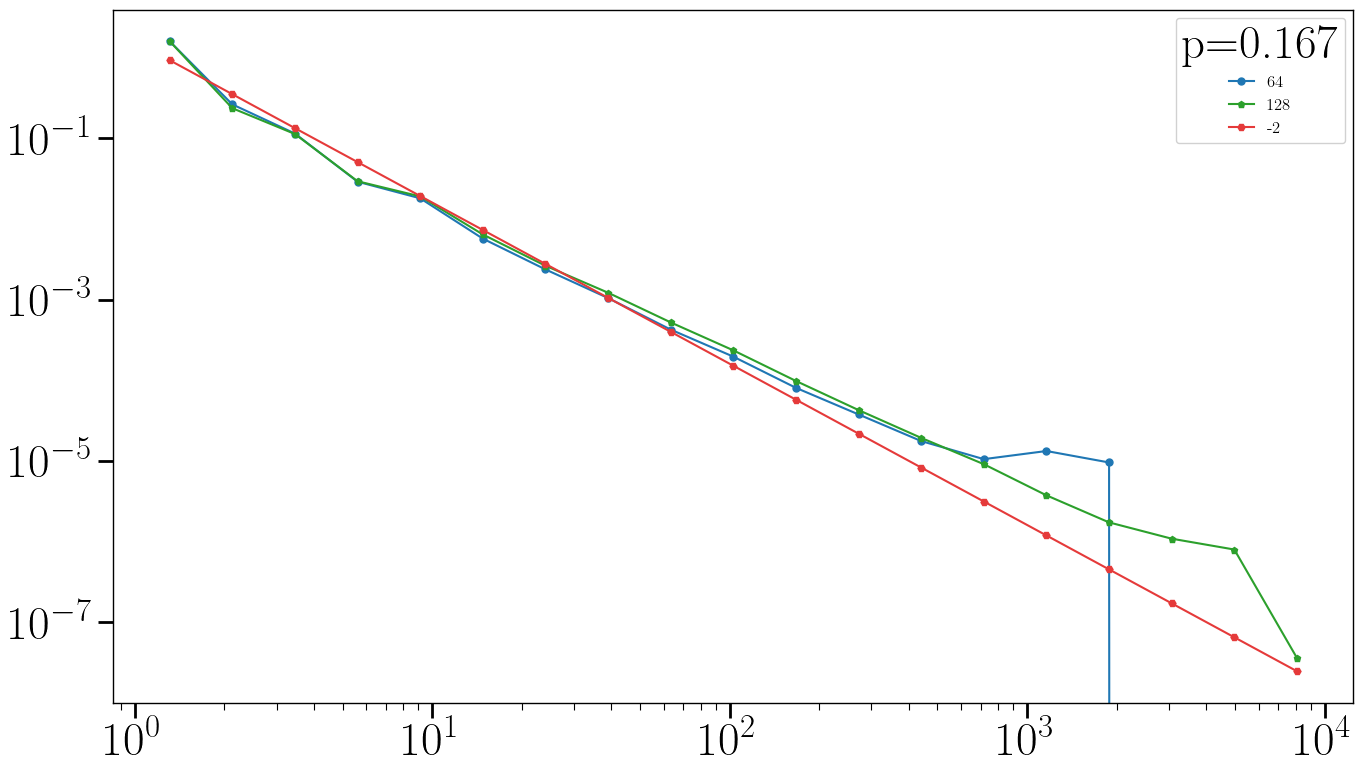

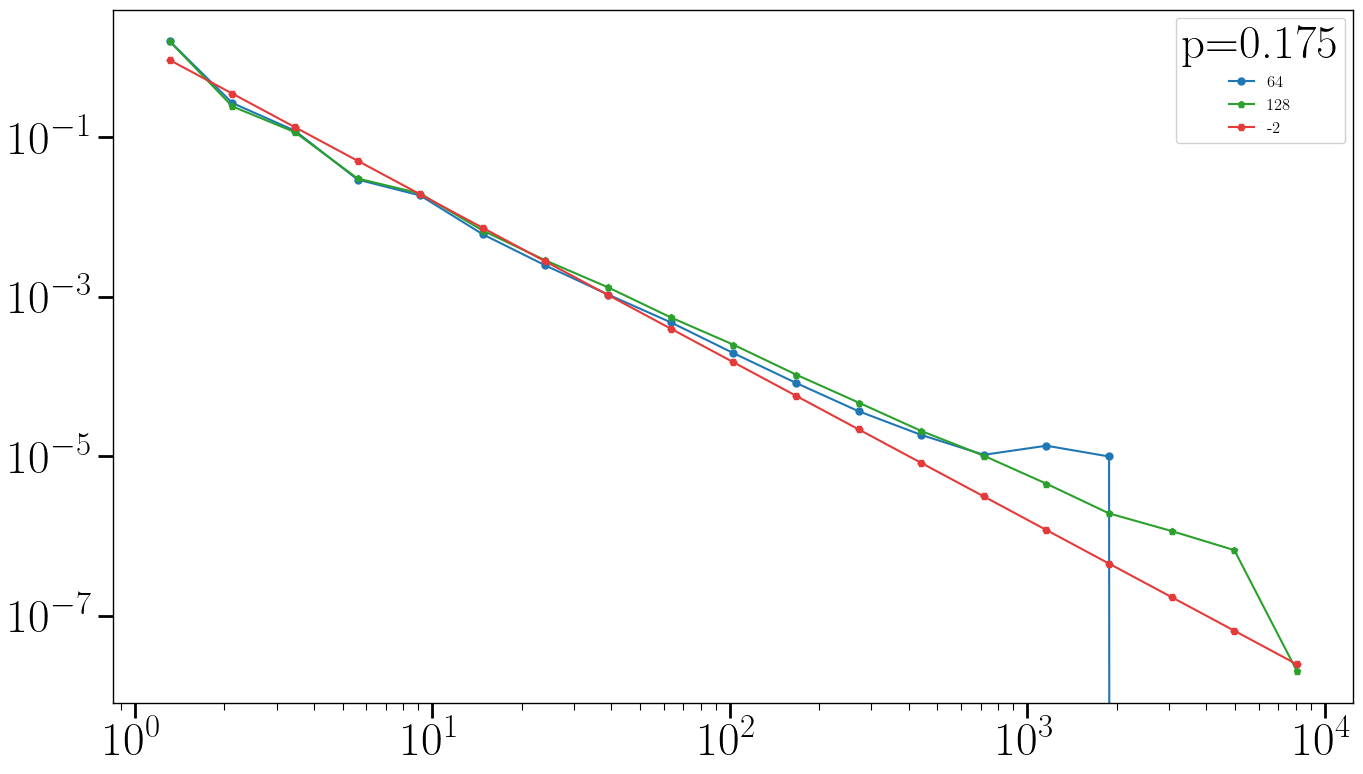

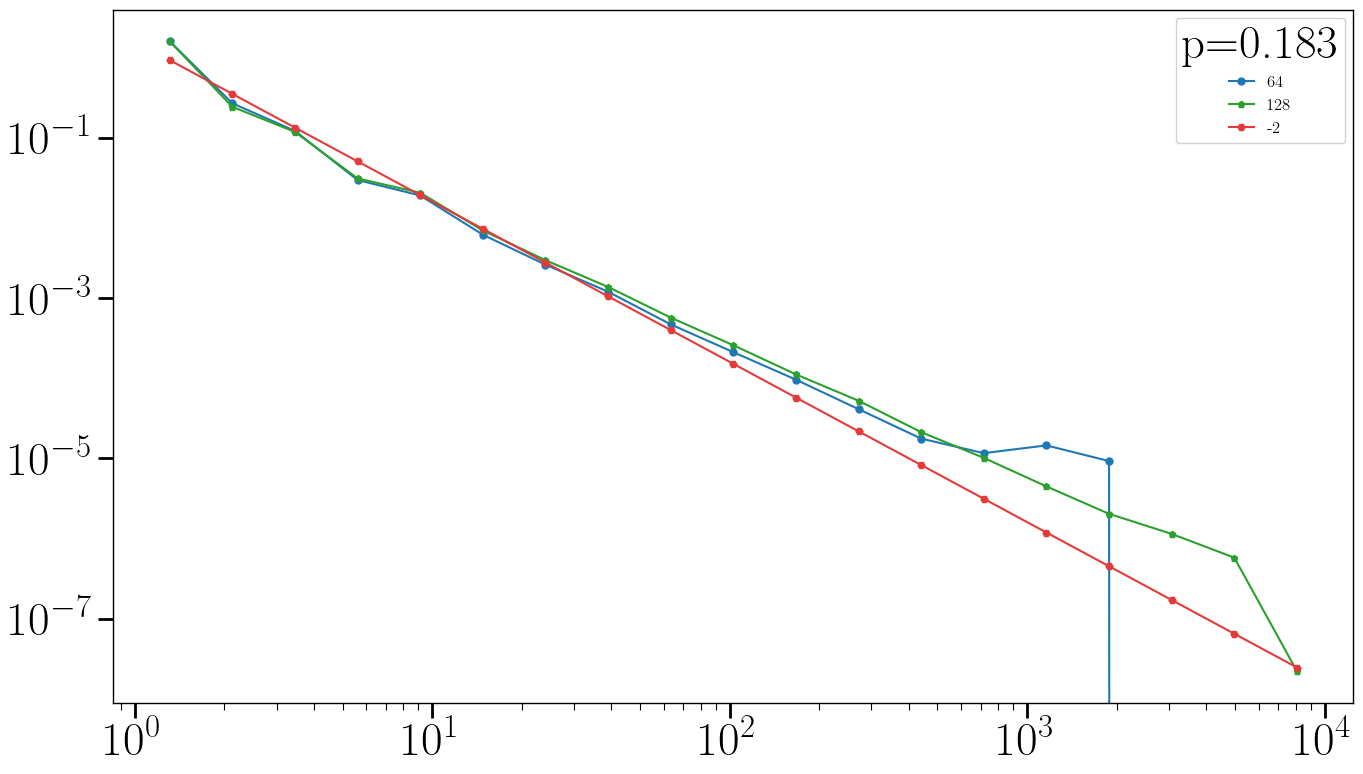

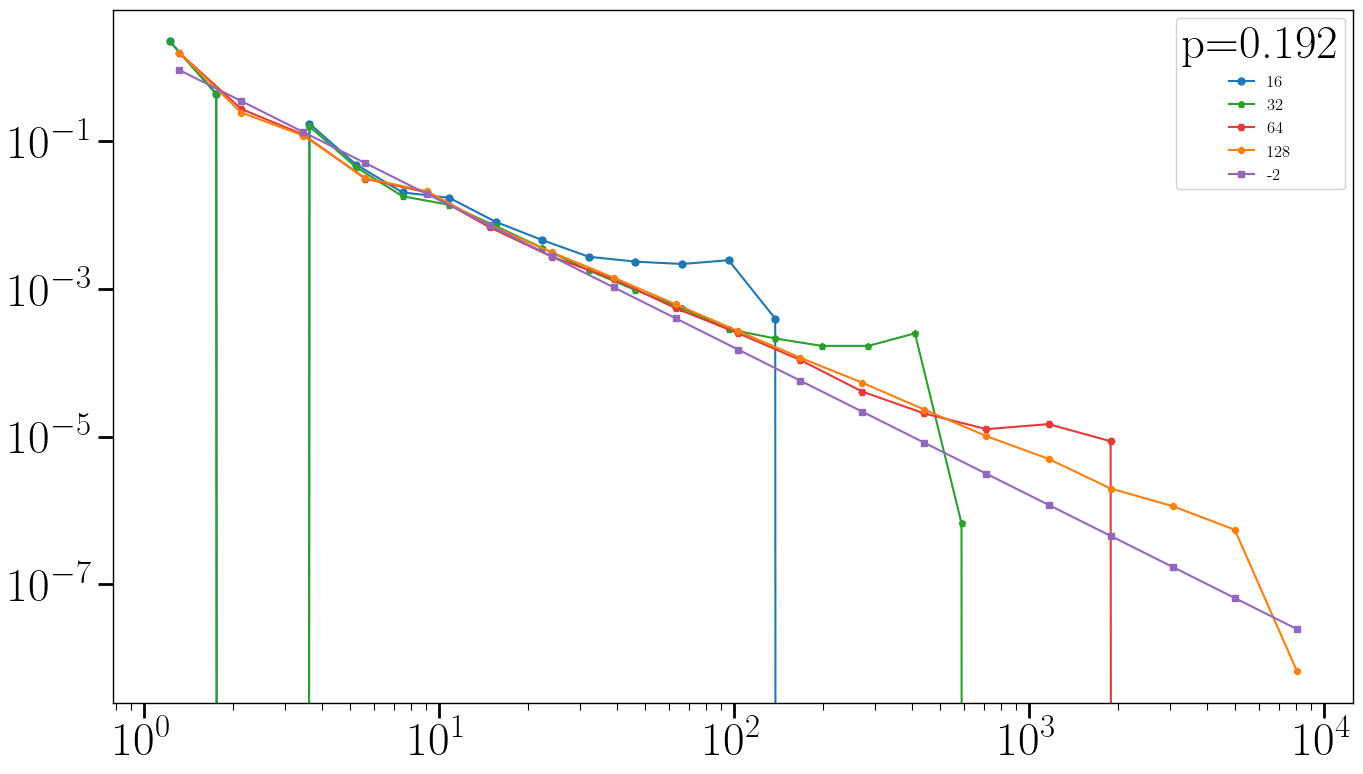

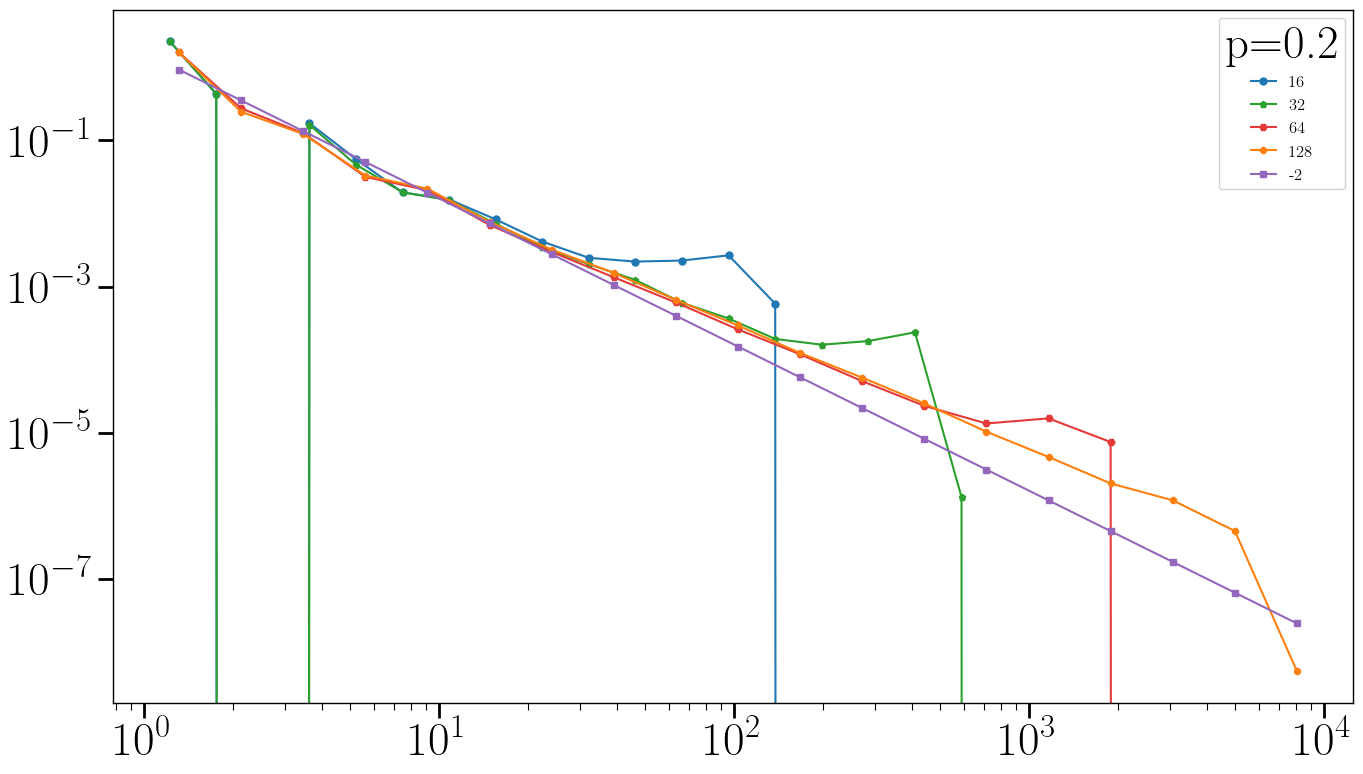

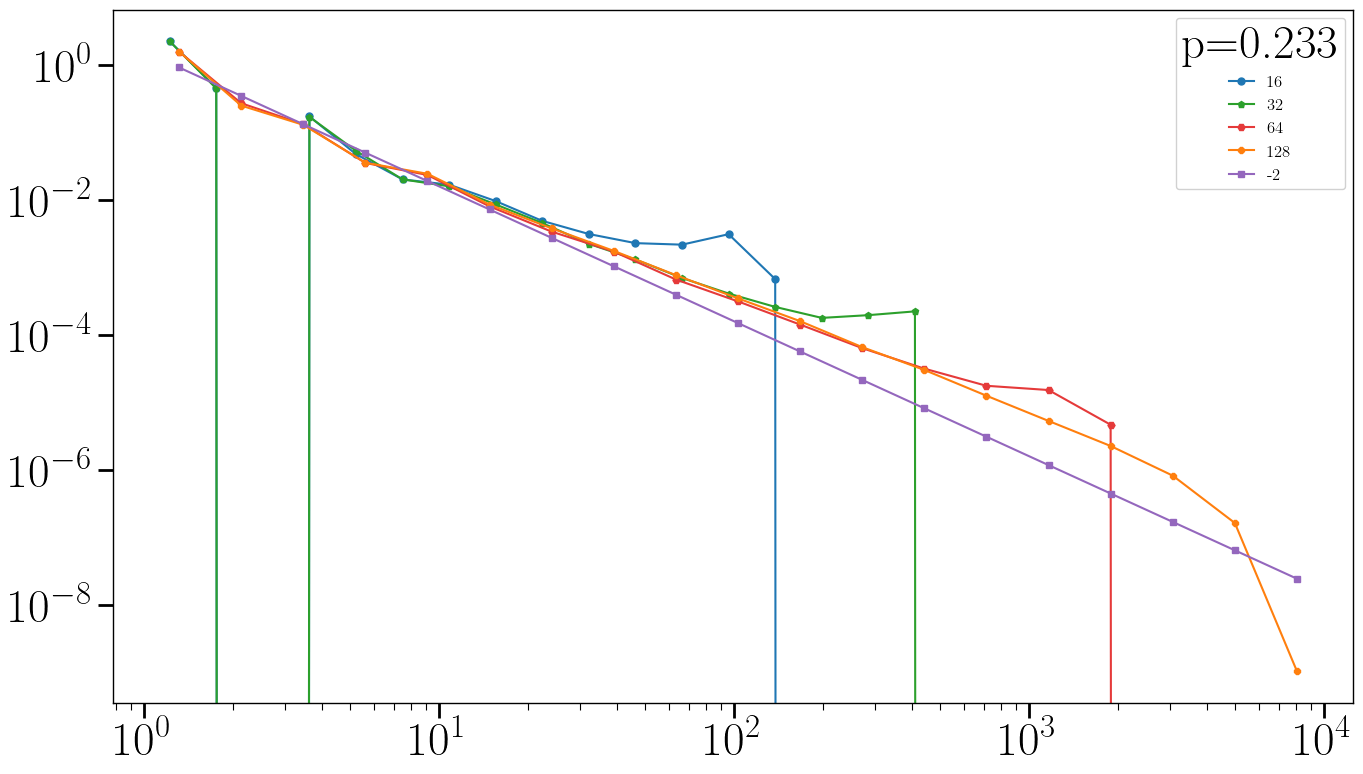

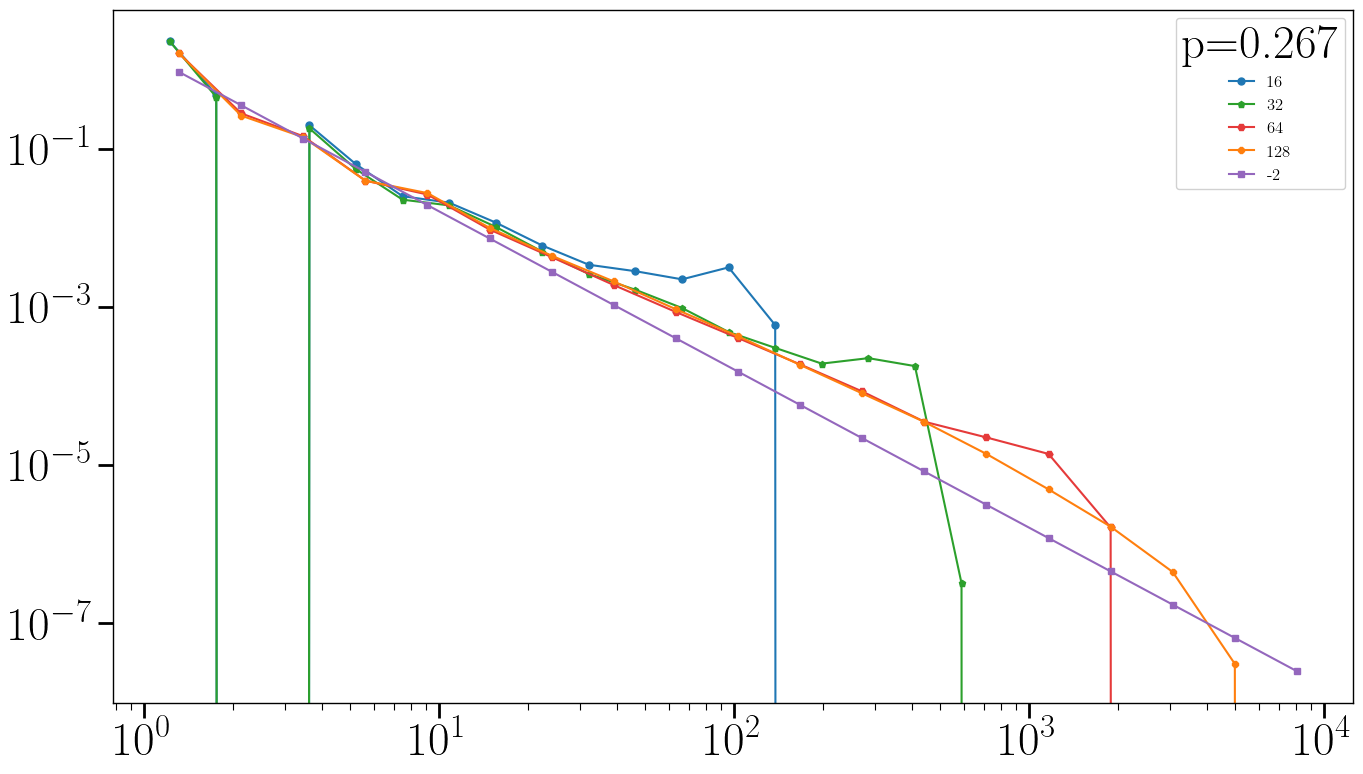

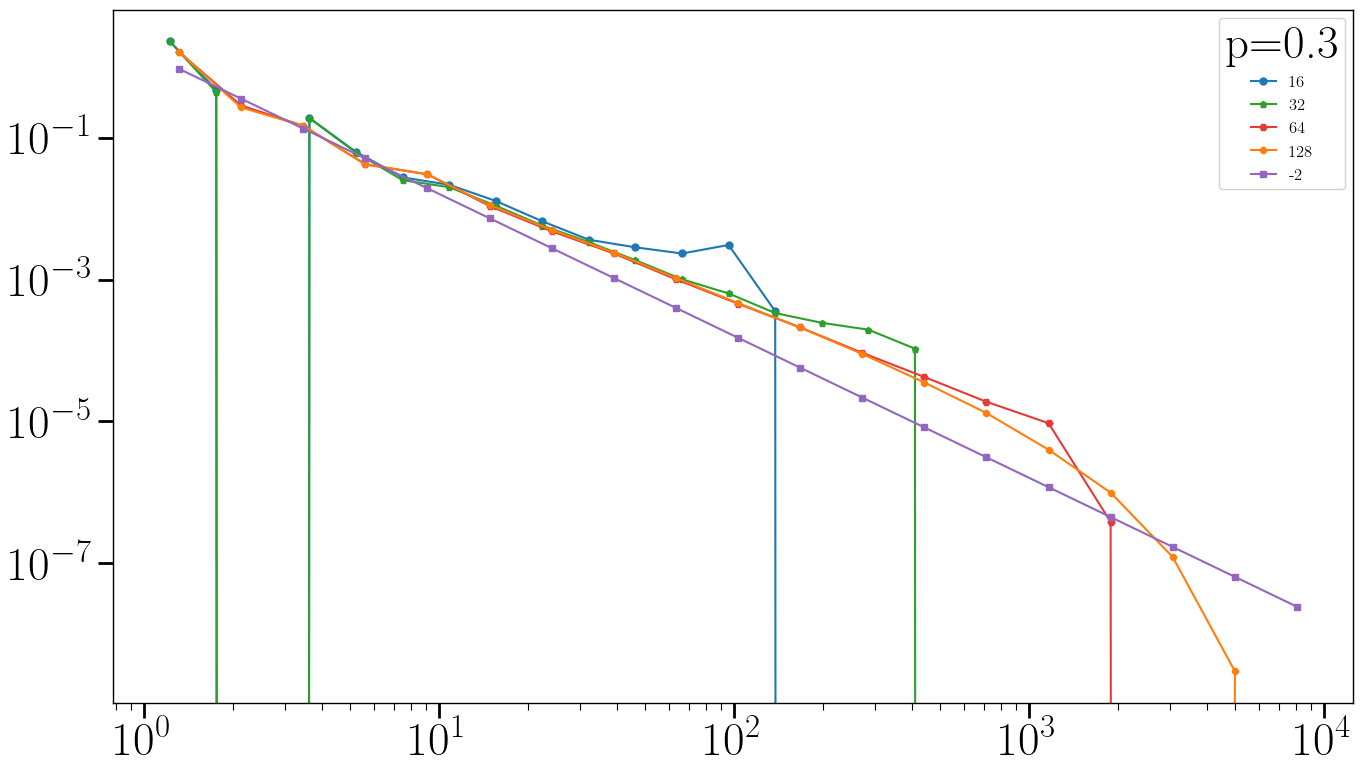

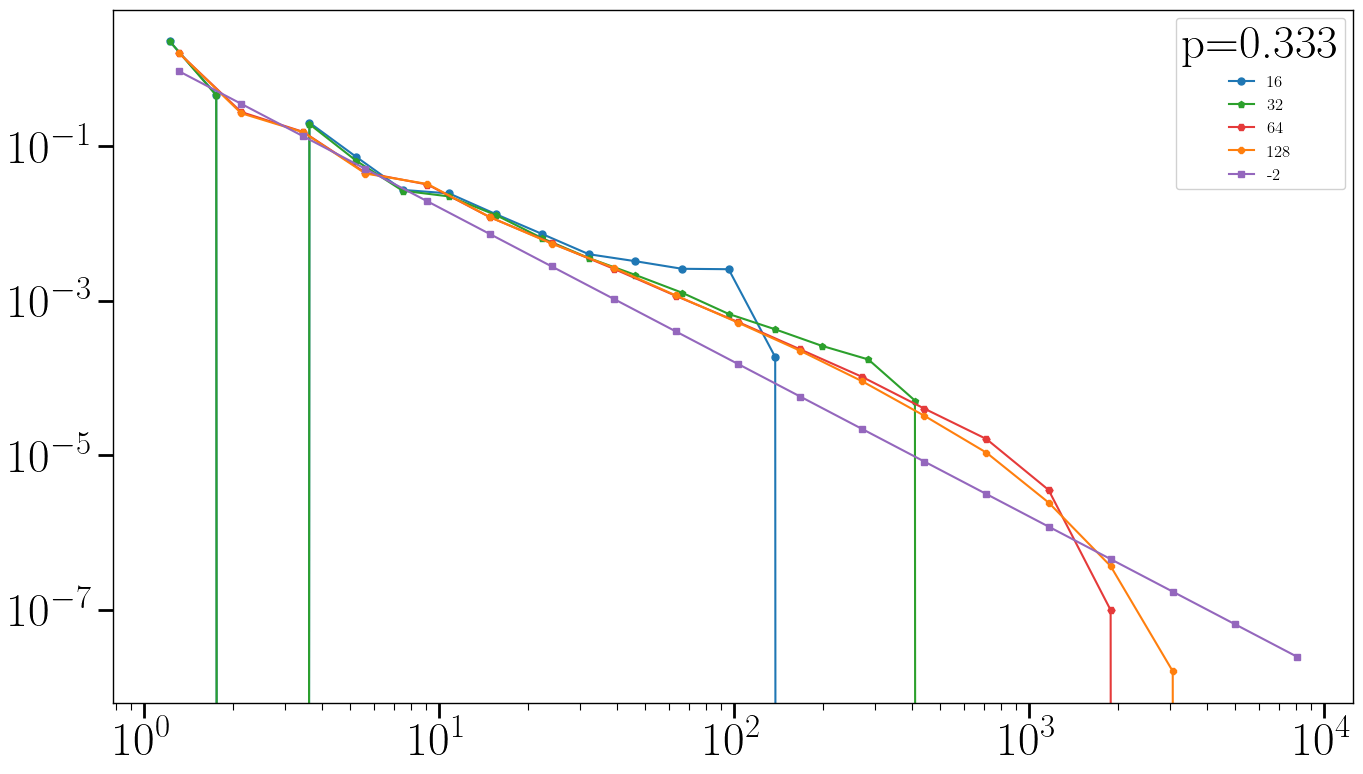

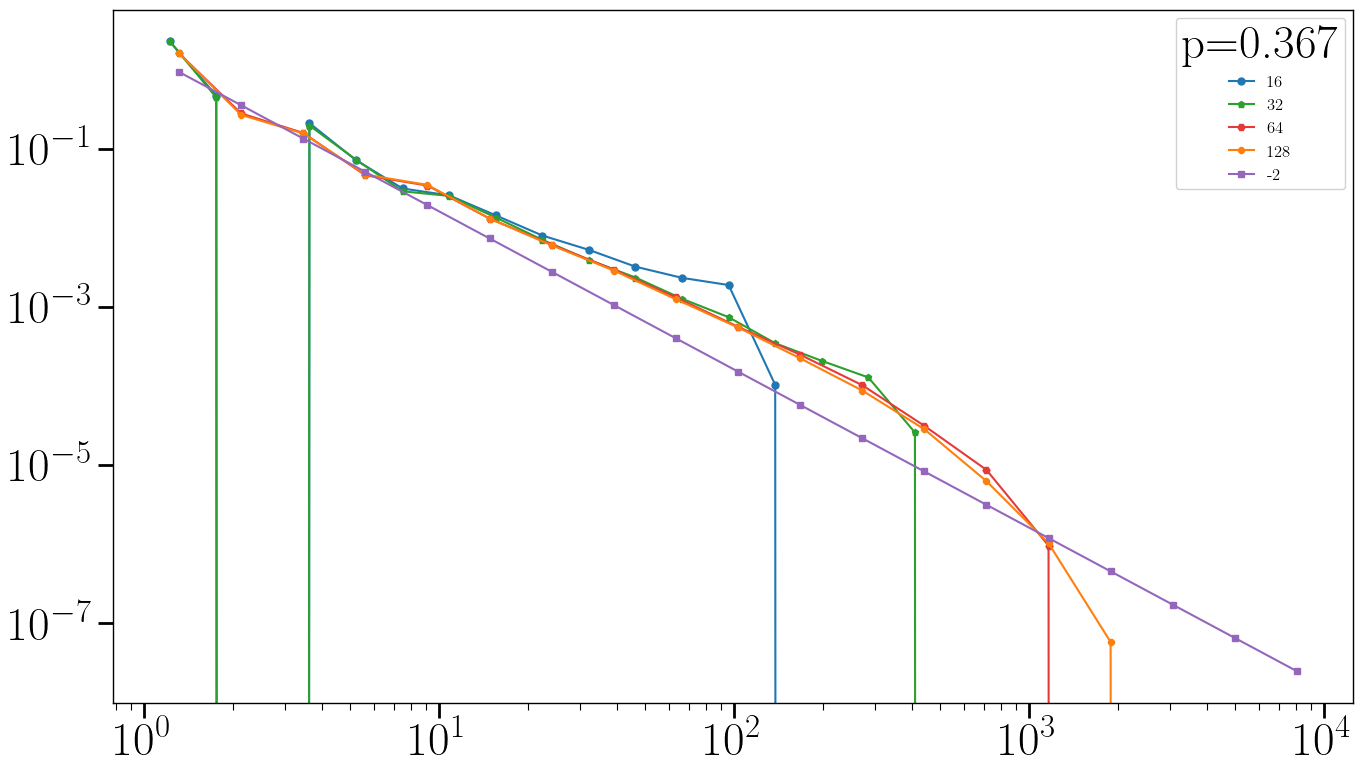

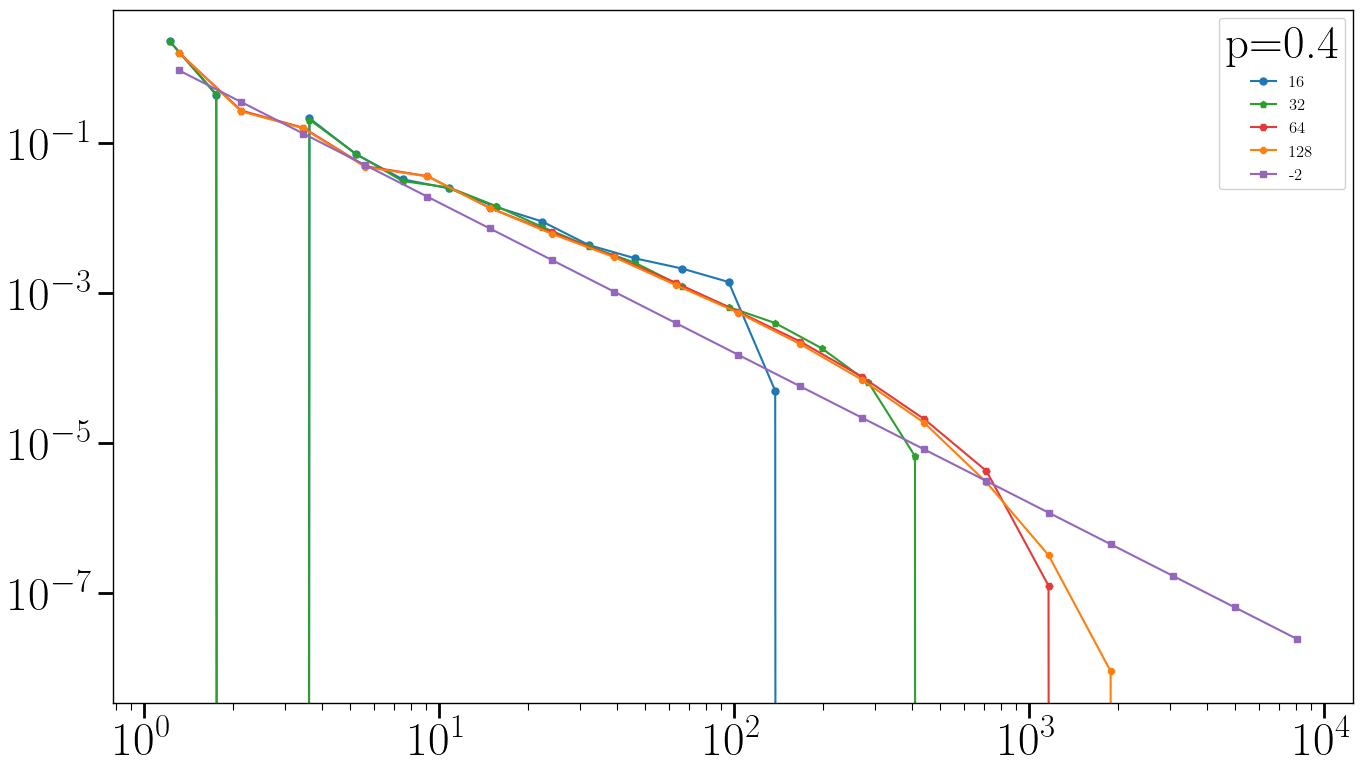

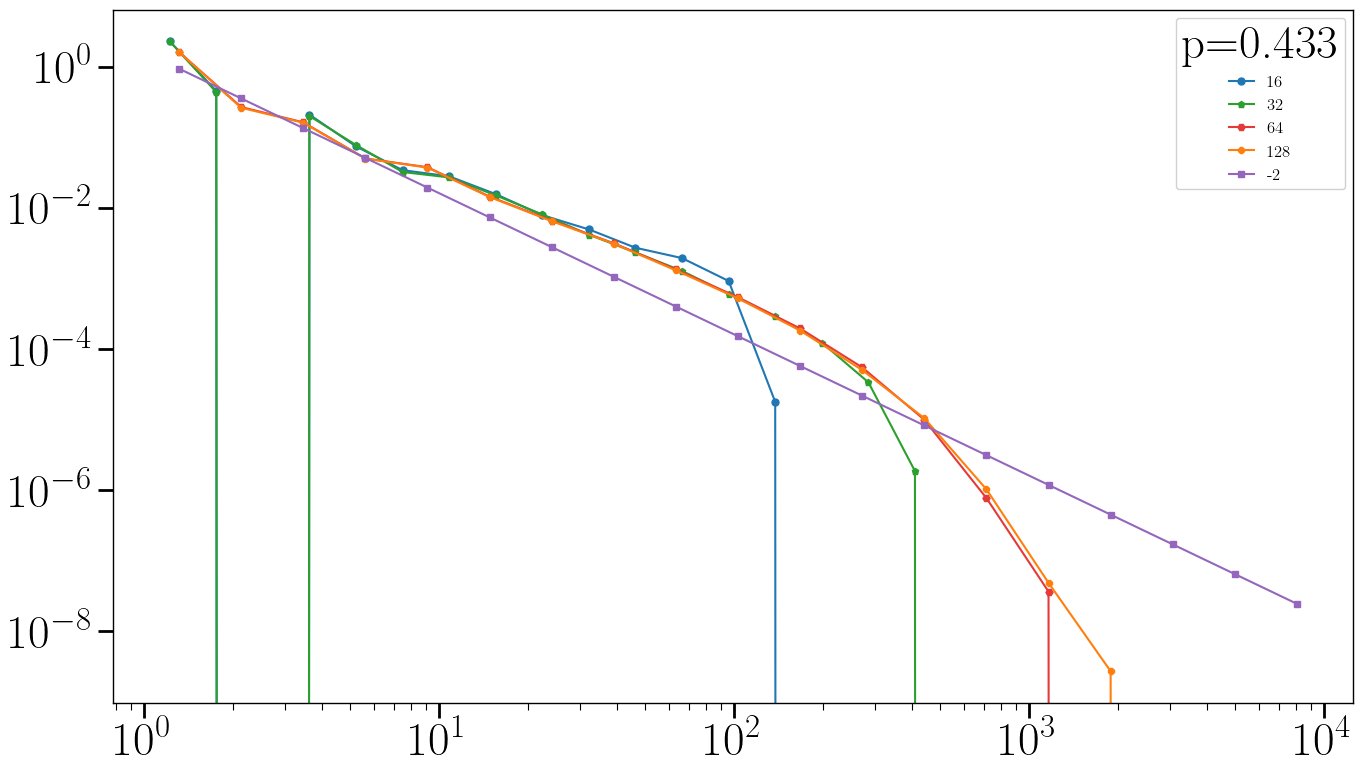

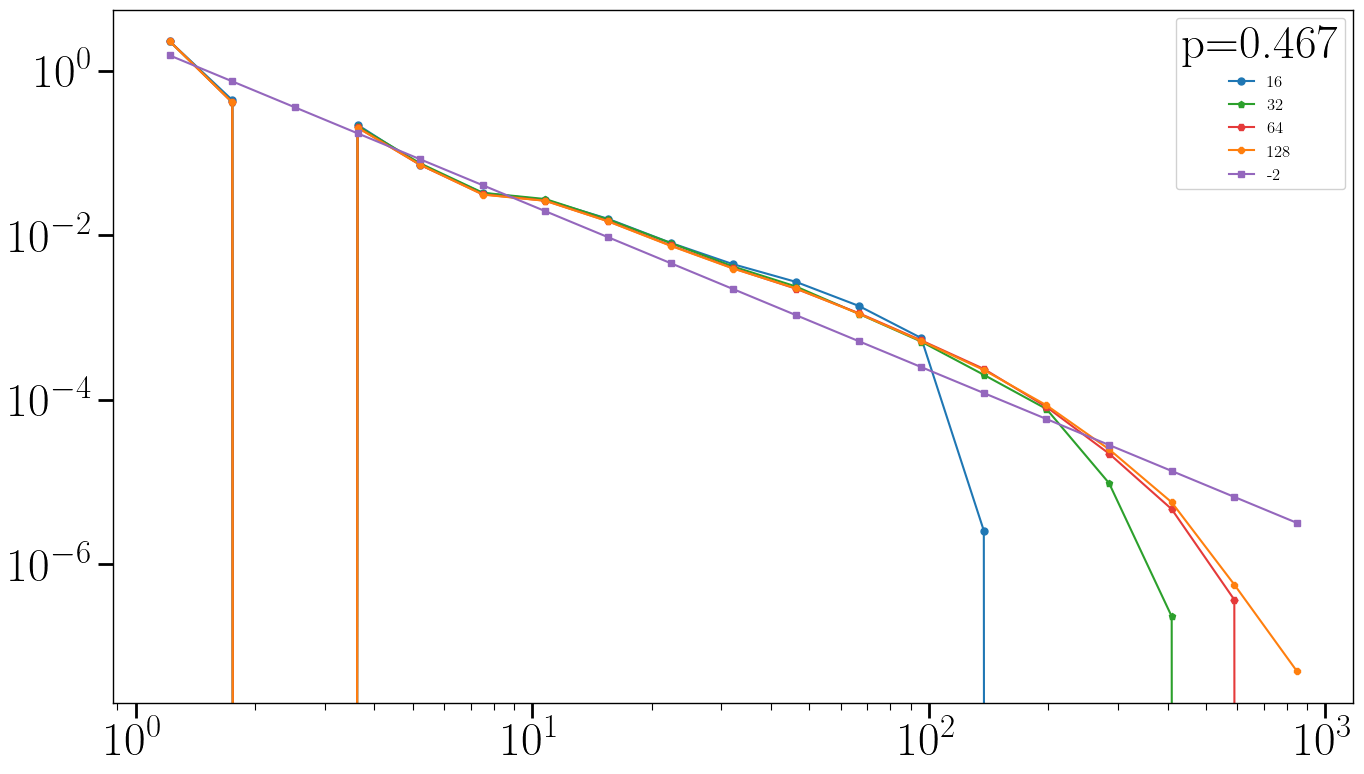

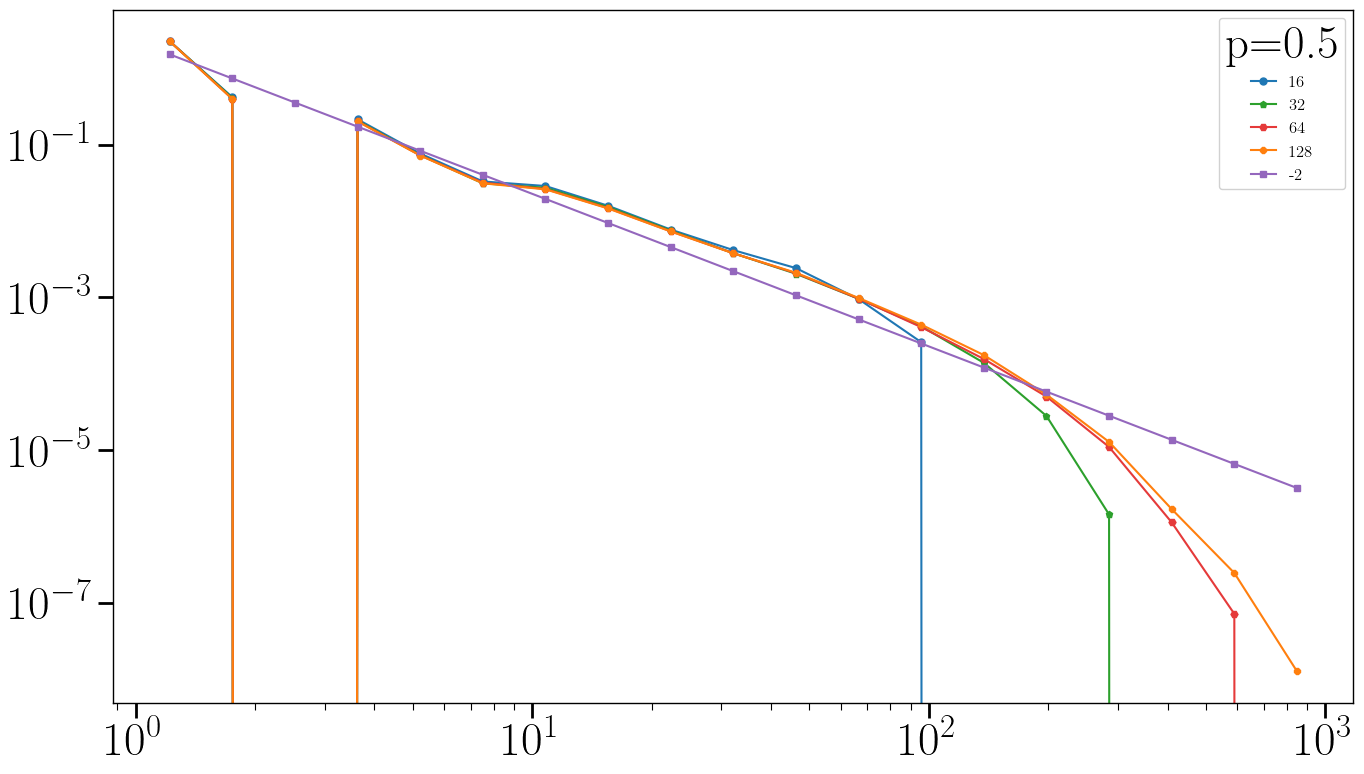

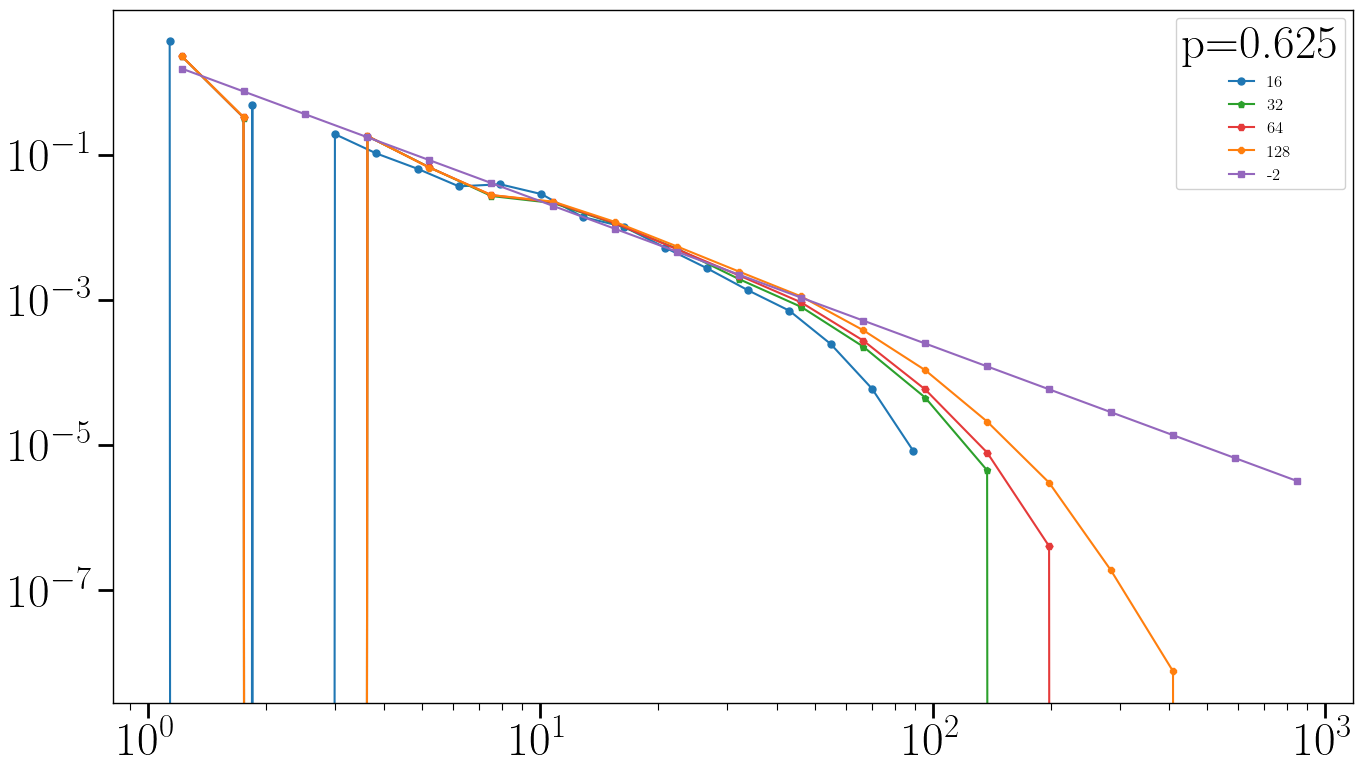

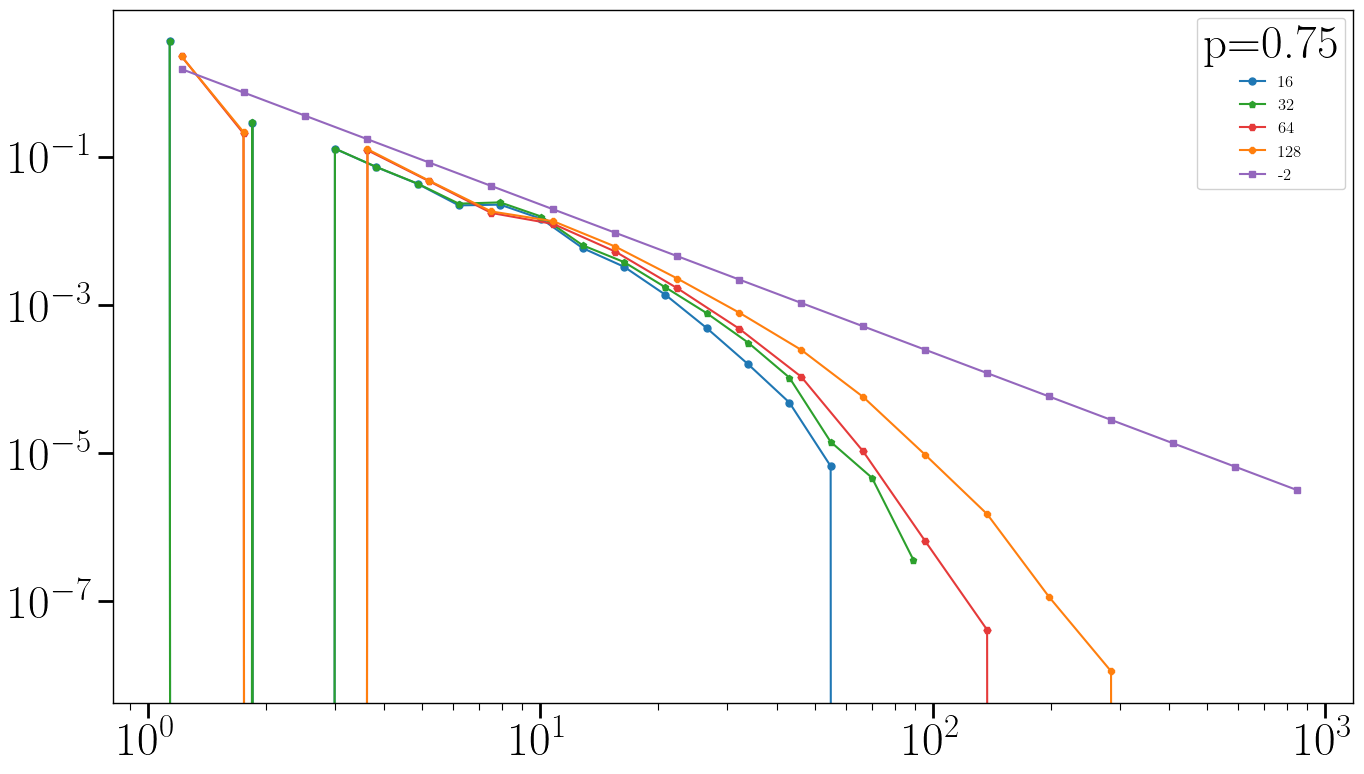

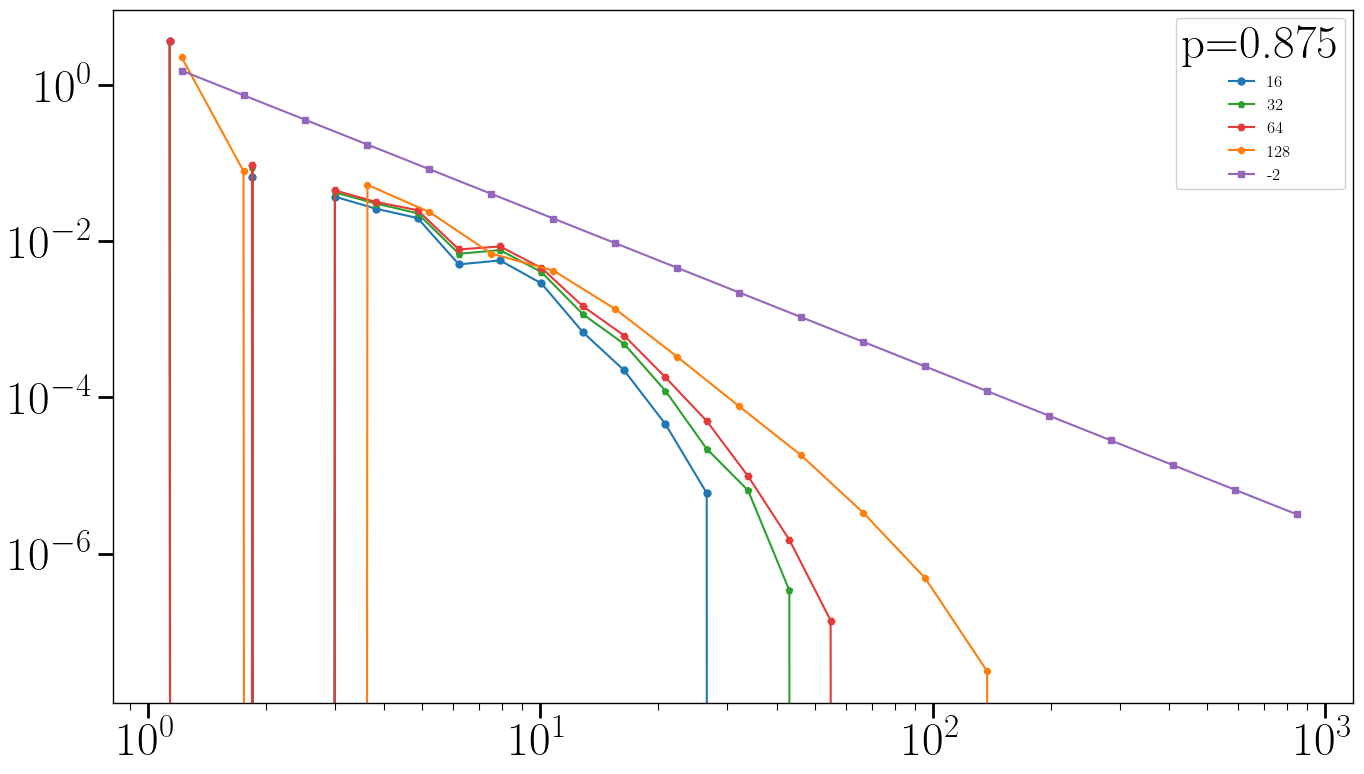

/tmp/ipykernel_41034/3370239317.py:13: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x, y/w/y[0], label=f"{side}")
/tmp/ipykernel_41034/3370239317.py:13: RuntimeWarning: invalid value encountered in divide
  plt.plot(x, y/w/y[0], label=f"{side}")
/tmp/ipykernel_41034/3370239317.py:14: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x, (y/w)[0]*x**(-2)/y[0], label=f"-2")
/tmp/ipykernel_41034/3370239317.py:14: RuntimeWarning: invalid value encountered in divide
  plt.plot(x, (y/w)[0]*x**(-2)/y[0], label=f"-2")


ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 1600x900 with 1 Axes>

In [13]:
for p,_ in p_values_shared_count:
    plt.figure()
    for side in [8, 16, 32, 64, 128]:
        fpath = f"{lrgpath}N={side**2}/pCluster_p={p:.3g}_{cell}_na={number_of_averages}.pkl"
        try:
            with open(fpath, 'rb') as file:
                data = pickle.load(file)
        except:
            continue
        sizes, counts = map(np.array, zip(*sorted(data.items())))
        data = np.repeat(sizes, counts)
        x, y, w = log_binning(data)
        plt.plot(x, y/w/y[0], label=f"{side}")
    plt.plot(x, (y/w)[0]*x**(-2)/y[0], label=f"-2")
    # plt.ylim(bottom=1)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(title=f"p={p:.3g}")
    plt.show()

In [ ]:
# data = np.loadtxt("data/cluster_data/l2d_hexagonal/phtra/N=16384/cat_single.txt", delimiter=',')#data/cluster_data/l2d_triangular/phtra/L1=128_L2=64
# data2 = np.loadtxt("data/cluster_data/l2d_hexagonal/phtra/N=16384/cat_hexagon.txt", delimiter=',')

# data = data[data[:, -2].argsort()]
# data2 = data2[data2[:, -2].argsort()]
# plt.plot(data[:, -2], gaussian_filter(data[:, 1],sigma=0), '-')
# plt.plot(data2[:, -2], gaussian_filter(data2[:, 1],sigma=0), '-')

# # plt.axvline(0.065)

In [ ]:
side = 128
p = 0.0671
cell = 'single'
number_of_averages = 1000
fpath = f"data/cluster_data_perc/l2d_squared/lrgsg/N={side**2}/pCluster_p={p:.3g}_{cell}_na={number_of_averages}.pkl"
try:
    with open(fpath, 'rb') as file:
        data = pickle.load(file)
except:
    print('no data found')

In [ ]:
sizes, counts = map(np.array, zip(*sorted(data.items())))
data = np.repeat(sizes, counts)

no data found


Calculating best minimal value for power law fit
/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:1178: RuntimeWarning: overflow encountered in scalar power
  return (self.alpha-1) * self.xmin**(self.alpha-1)
/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:825: RuntimeWarning: invalid value encountered in multiply
  likelihoods = f*C
/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:1178: RuntimeWarning: overflow encountered in scalar multiply
  return (self.alpha-1) * self.xmin**(self.alpha-1)
Calculating best minimal value for power law fit
/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/scipy/optimize/_optimize.py:917: RuntimeWarning: invalid valu

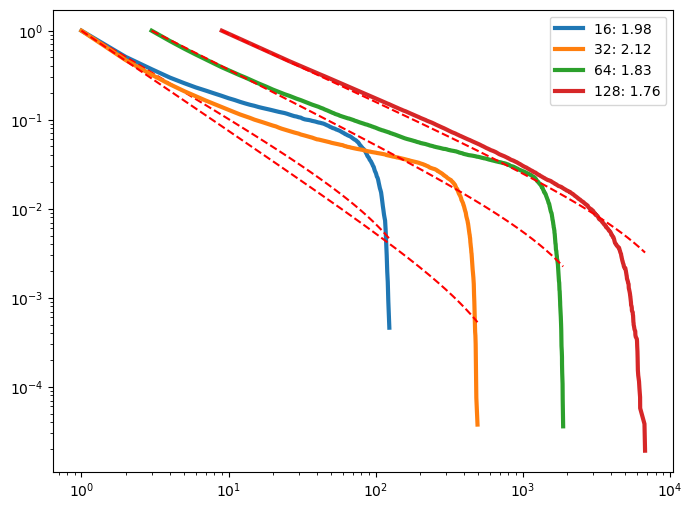

In [ ]:
plt.figure(figsize=(8, 6))

p = 0.192#p_values_filtered[3]
cell = 'single'
number_of_averages = 1000
for side in [8, 16, 32, 64, 128]:
    fpath = f"data/cluster_data_perc/l2d_squared/lrgsg/N={side**2}/pCluster_p={p:.3g}_{cell}_na={number_of_averages}.pkl"
    try:
        with open(fpath, 'rb') as file:
            data = pickle.load(file)
    except:
        print('no data found')
        continue
    sizes, counts = map(np.array, zip(*sorted(data.items())))
    data = np.repeat(sizes, counts)
    try:
        # sorted_indices = np.argsort(data)[::-1]
        # sorted_data = data[sorted_indices]
        # # Generate ranks for each size
        # ranks = np.arange(1, len(data) + 1)
        # Make the rank-size plot
        # plt.loglog(ranks, sorted_data, marker='o', linestyle='-', color='b')
        fit = powerlaw.Fit(data, xmax=side**2)
        figCCDF = fit.plot_ccdf(linewidth=3, label=f"{side}: {fit.alpha:.3g}")
        fit.power_law.plot_ccdf(ax=figCCDF, color='r', linestyle='--',)
    except:
        pass
plt.legend()

In [ ]:
fit = powerlaw.Fit(data)
R, p = fit.distribution_compare('power_law', 'exponential')

Calculating best minimal value for power law fit


In [ ]:
p

0.0

p=0.1 is shared by 3 subdirectories
p=0.109 is shared by 2 subdirectories
p=0.117 is shared by 2 subdirectories
p=0.134 is shared by 2 subdirectories
p=0.142 is shared by 2 subdirectories
p=0.15 is shared by 2 subdirectories
p=0.159 is shared by 2 subdirectories
p=0.167 is shared by 2 subdirectories
p=0.175 is shared by 2 subdirectories
p=0.183 is shared by 2 subdirectories
p=0.192 is shared by 4 subdirectories
p=0.2 is shared by 4 subdirectories
p=0.233 is shared by 4 subdirectories
p=0.267 is shared by 4 subdirectories
p=0.3 is shared by 4 subdirectories
p=0.333 is shared by 4 subdirectories
p=0.367 is shared by 4 subdirectories
p=0.4 is shared by 4 subdirectories
p=0.433 is shared by 4 subdirectories
p=0.467 is shared by 4 subdirectories
p=0.5 is shared by 4 subdirectories
p=0.625 is shared by 4 subdirectories
p=0.75 is shared by 4 subdirectories
p=0.875 is shared by 4 subdirectories
p=1.0 is shared by 4 subdirectories


In [ ]:
import glob
import re
from collections import defaultdict

# Pattern to match "p=VALUE" where VALUE is the p value
pattern = r"p=([\d.]+)"

# Dictionary to hold sets of subdirectories for each found p value
p_values_dirs = defaultdict(set)

# Use glob to iterate over all .pkl files in subfolders of 'data/'
for filepath in glob.glob('data/cluster_data/l2d_squared/lrgsg/*/*.pkl'):
    match = re.search(pattern, filepath)
    if match:
        # Extract the p value
        p_value = float(match.group(1))
        # Extract subdirectory from the filepath
        subdirectory = filepath.split('/')[4]  # Adjust the index based on your path structure
        # Add the subdirectory to the set for this p value
        p_values_dirs[p_value].add(subdirectory)

# Filter out p values that do not appear in at least two different subdirectories
p_values_filtered = [p for p, dirs in p_values_dirs.items() if len(dirs) >= 2]

# Sort the values
p_values_filtered = sorted(p_values_filtered)

print(p_values_filtered)


[0.1, 0.109, 0.117, 0.134, 0.142, 0.15, 0.159, 0.167, 0.175, 0.183, 0.192, 0.2, 0.233, 0.267, 0.3, 0.333, 0.367, 0.4, 0.433, 0.467, 0.5, 0.625, 0.75, 0.875, 1.0]


In [ ]:
p_values_dirs

defaultdict(set,
            {0.267: {'lrgsg'},
             0.175: {'lrgsg'},
             0.134: {'lrgsg'},
             0.5: {'lrgsg'},
             0.4: {'lrgsg'},
             0.625: {'lrgsg'},
             0.035: {'lrgsg'},
             0.75: {'lrgsg'},
             0.333: {'lrgsg'},
             0.117: {'lrgsg'},
             0.0515: {'lrgsg'},
             0.142: {'lrgsg'},
             0.068: {'lrgsg'},
             0.109: {'lrgsg'},
             0.183: {'lrgsg'},
             0.3: {'lrgsg'},
             0.875: {'lrgsg'},
             0.00195: {'lrgsg'},
             0.126: {'lrgsg'},
             1.0: {'lrgsg'},
             0.167: {'lrgsg'},
             0.0762: {'lrgsg'},
             0.0267: {'lrgsg'},
             0.0845: {'lrgsg'},
             0.0597: {'lrgsg'},
             0.467: {'lrgsg'},
             0.0185: {'lrgsg'},
             0.0432: {'lrgsg'},
             0.0927: {'lrgsg'},
             0.2: {'lrgsg'},
             0.233: {'lrgsg'},
             0.0102: {'

In [ ]:


# Pattern to match "p=VALUE" where VALUE is the p value
pattern = r"p=([\d.]+)"

# List to hold all found p values
p_values = []

# Use glob to iterate over all .pkl files in subfolders of 'data/'
for filepath in glob.glob('data/cluster_data/l2d_squared/lrgsg/*/*.pkl'):
    match = re.search(pattern, filepath)
    if match:
        # Extract and store the p value
        p_values.append(float(match.group(1)))

# Remove duplicates and sort the values
p_values = sorted(set(p_values))

print(p_values)

[0.000691, 0.00195, 0.00552, 0.00857, 0.009, 0.0102, 0.0136, 0.0156, 0.0169, 0.0173, 0.0185, 0.0217, 0.0233, 0.0252, 0.0256, 0.0267, 0.0298, 0.031, 0.0335, 0.0339, 0.035, 0.0379, 0.0387, 0.0419, 0.0422, 0.0432, 0.046, 0.0464, 0.0502, 0.0505, 0.0515, 0.054, 0.0541, 0.0588, 0.0597, 0.0617, 0.0622, 0.0668, 0.0671, 0.068, 0.0694, 0.0703, 0.0752, 0.0754, 0.0762, 0.0771, 0.0785, 0.0837, 0.0845, 0.0848, 0.0866, 0.0918, 0.092, 0.0924, 0.0927, 0.0947, 0.1, 0.101, 0.103, 0.108, 0.109, 0.111, 0.115, 0.117, 0.119, 0.123, 0.125, 0.126, 0.127, 0.131, 0.134, 0.135, 0.139, 0.142, 0.143, 0.146, 0.15, 0.151, 0.154, 0.158, 0.159, 0.162, 0.167, 0.168, 0.169, 0.175, 0.176, 0.177, 0.183, 0.184, 0.185, 0.192, 0.2, 0.233, 0.267, 0.3, 0.333, 0.367, 0.4, 0.433, 0.467, 0.5, 0.625, 0.75, 0.875, 1.0]


In [ ]:
side = 64
cmap = plt.cm.twilight
colors = cmap(np.linspace(0.2, 0.8, len(p_values)))
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)
pval_real = []
for p in p_values:
    cell = 'single'
    number_of_averages = 1000
    fpath = f"data/cluster_data_perc/l2d_squared/lrgsg/N={side**2}/pCluster_p={p:.3g}_{cell}_na={number_of_averages}.pkl"
    try:
        with open(fpath, 'rb') as file:
            data = pickle.load(file)
    except:
        continue
    sizes, counts = zip(*sorted(data.items()))
    sizes = np.array(sizes)
    counts = np.array(counts)
    # Replicate sizes based on normalized probabilities for log binning
    # Using np.repeat and multiplying probabilities by a large number to simulate replication
    replicated_sizes = np.repeat(np.array(sizes), counts) 
    # Perform log binning on the replicated distribution
    # bin_centers, hist, bin_w = log_binning(replicated_sizes, binnum=bins)

    # total_area = np.sum(hist * bin_w)

    # Normalize the histogram to make it a probability distribution
    # normalized_hist = hist / total_area
    # print(replicated_sizes)
    # Plot the normalized probability distribution

    # line, = plt.plot(bin_centers, hist / bin_w, marker='o', linestyle='-', linewidth=2, label=f'N={side**2}')
        # plt.plot(sizes, counts)
    arr = []
    data = np.repeat(sizes, counts)
    try:
        fit = powerlaw.Fit(data/np.max(data))
        # fit.plot_pdf(linewidth=2)
        # x, y, w = log_binning(data, binnum=10)
        if 0.09 < p < 0.15:
            # plt.plot(x, y/w, marker='.')
            fit = powerlaw.Fit(data/np.max(data))
            figCCDF = fit.plot_ccdf(linewidth=3)
            fit.power_law.plot_ccdf(ax=figCCDF, color='r', linestyle='--',)
            # fit.plot_pdf(color='b', linewidth=2)
            # fit.power_law.plot_pdf(color='r', linestyle='--')
        # Print the xmin value of the fit
        arr.append([p, fit.alpha])
    except ValueError:
        continue
    pval_real.append(p)
    # else:
    #     plt.plot(sizes, counts, c='red', zorder=10)
x = np.logspace(0, 3)
cmap = plt.cm.twilight
cmap_val = cmap(np.linspace(0.2, 0.8, len(pval_real)))
custom_cmap = LinearSegmentedColormap.from_list("custom_twilight", cmap_val)
# cmap_tra = create_custom_colormap(c1="#02a618", c2="#00eeff")
cmap_nrm = Normalize(vmin=min(pval_real), vmax=max(pval_real))
plt.colorbar(ScalarMappable(norm=cmap_nrm, cmap=custom_cmap),  ax=plt.gca(), orientation='vertical')
# plt.plot(x,5*10**5*x.astype(float)**(-2.), 'k--', zorder=11)
    # plt.axvline(side**2, c=line.get_color())

#     binc, hist, bw = log_binning(prova, 8)
#     hist1 = hist/bw
#     np.where(hist1==0., np.inf, hist1)
#     plt.plot(binc, np.where(hist1==0., np.inf, hist1), 'h-', label=f"{side}")
# plt.plot(binc, 5*(1.0*np.array(binc))**(-1.1))
#
# x = np.logspace(0, 4.5)
# plt.plot(x, 3e7*x**(-.8), 'k')
for i,j in arr:
    print("p: ", i, " - alpha: ", j)
plt.xscale('log')
plt.yscale('log')
plt.legend()
# plt.ylim(bottom=0.01)

NameError: name 'plt' is not defined

In [ ]:
number_of_averages = 1000
merged_dict = Counter()
for L in [8, 16, 32, 64, 128]:
    for p in [0.01, 0.034, 0.08, 0.103, 0.12, 0.206, 0.412]:
        lattice = Lattice2D(L, pflip=p, dataOutdir="data/cluster_data_perc/",  init_weight_dict=False)
        filename = f'{lattice.lrgsgpath}p={p:.3g}_na={number_of_averages}_.pkl'
        print(filename)
        if os.path.exists(filename):
            print('reading')
            with open(filename, 'rb') as file:
                data = pickle.load(file)

data/cluster_data2/l2d_squared/lrgsg/N=64/p=0.01_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=64/p=0.034_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=64/p=0.08_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=64/p=0.103_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=64/p=0.12_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=64/p=0.206_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=64/p=0.412_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=256/p=0.01_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=256/p=0.034_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=256/p=0.08_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=256/p=0.103_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=256/p=0.12_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=256/p=0.206_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=256/p=0.412_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=1024/p=0.01_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=1024/p=0.034_n

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


377789 1048576
229763 524176
103051 262144
34081 65536
12642 16384
3621 4096
970 1024


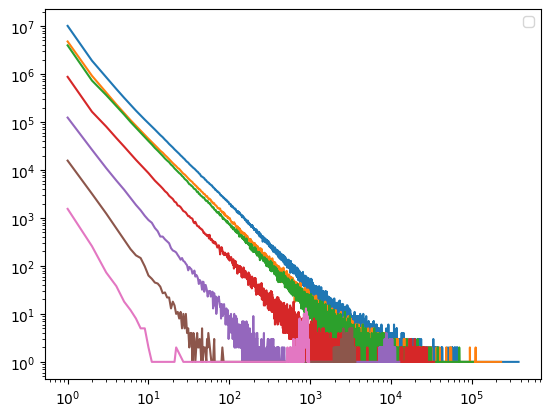

In [ ]:
p = 0.103
#
for side, bins in zip(reversed([32, 64, 128, 256, 512, 724, 1024]), reversed([5, 10, 10, 6, 8, 10, 10, 10])):
    fpath = f"data/cluster_data/l2d_squared/lrgsg/N={side**2}/p={p:.3g}_na={number_of_averages}_.pkl"
    try:
        with open(fpath, 'rb') as file:
            data = pickle.load(file)
    except:
        continue
    sizes, counts = zip(*sorted(data.items()))
    print(np.max(sizes), side**2)
    sizes = np.array(sizes)
    counts = np.array(counts)
    # Replicate sizes based on normalized probabilities for log binning
    # Using np.repeat and multiplying probabilities by a large number to simulate replication
    replicated_sizes = np.repeat(np.array(sizes), counts) 
    # Perform log binning on the replicated distribution
    # bin_centers, hist, bin_w = log_binning(replicated_sizes, binnum=bins)

    # total_area = np.sum(hist * bin_w)

    # Normalize the histogram to make it a probability distribution
    # normalized_hist = hist / total_area
    # print(replicated_sizes)
    # Plot the normalized probability distribution

    # line, = plt.plot(bin_centers, hist / bin_w, marker='o', linestyle='-', linewidth=2, label=f'N={side**2}')
    plt.plot(sizes, counts)
    # plt.axvline(side**2, c=line.get_color())

#     binc, hist, bw = log_binning(prova, 8)
#     hist1 = hist/bw
#     np.where(hist1==0., np.inf, hist1)
#     plt.plot(binc, np.where(hist1==0., np.inf, hist1), 'h-', label=f"{side}")
# plt.plot(binc, 5*(1.0*np.array(binc))**(-1.1))
#
# x = np.logspace(0, 4.5)
# plt.plot(x, 3e7*x**(-.8), 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend()

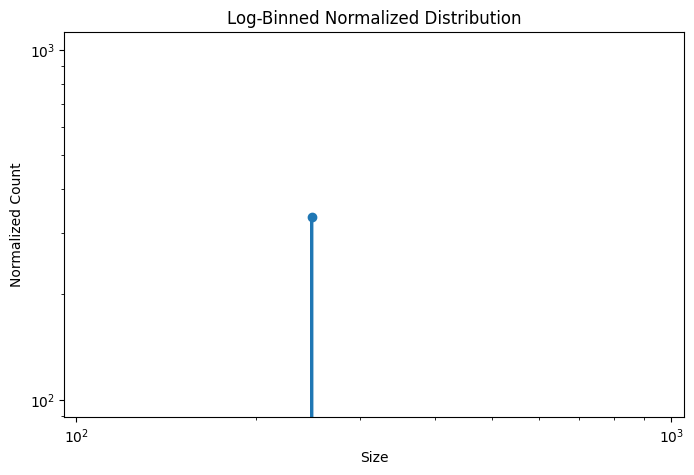

In [ ]:


# Normalize counts to probabilities
total_counts = np.sum(counts)
probabilities = counts / total_counts

# Replicate sizes based on normalized probabilities for log binning
# Using np.repeat and multiplying probabilities by a large number to simulate replication
replicated_sizes = np.repeat(np.array(sizes), (probabilities * 10000).astype('int64')) 

# Perform log binning on the replicated distribution
bin_centers, hist, bin_w = log_binning(replicated_sizes, binnum=20)

# Plot the log-binned data using plt.plot
plt.plot(bin_centers, hist / bin_w, marker='o', linestyle='-', linewidth=2)  # Normalizing y-values by bin width
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Size')
plt.ylabel('Normalized Count')
plt.title('Log-Binned Normalized Distribution')
plt.show()


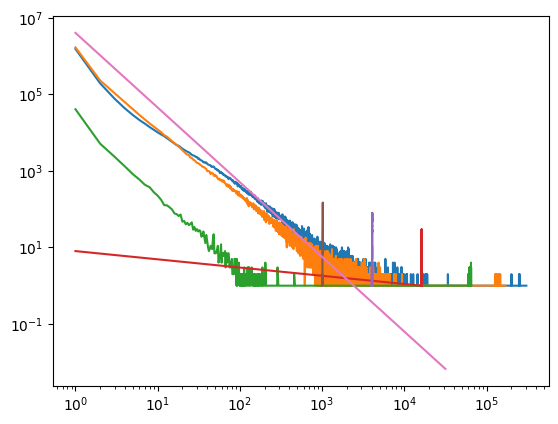

In [ ]:
p = 0.034
#
for side in reversed([32, 64, 128, 256, 512, 724]):
    fpath = f"data/cluster_data/l2d_squared/lrgsg/N={side**2}/p={p:.3g}_na={1000}_.pkl"
    try:
        with open(fpath, 'rb') as file:
            data = pickle.load(file)
    except:
        continue
    sizes, counts = zip(*sorted(data.items()))
    plt.plot(sizes, counts)
#     binc, hist, bw = log_binning(prova, 8)
#     hist1 = hist/bw
#     np.where(hist1==0., np.inf, hist1)
#     plt.plot(binc, np.where(hist1==0., np.inf, hist1), 'h-', label=f"{side}")
# plt.plot(binc, 5*(1.0*np.array(binc))**(-1.1))
#
x = np.logspace(0, 4.5)
plt.plot(x, 4e6*x**(-1.95))
plt.xscale('log')
plt.yscale('log')